In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **데이터 로드 (2024년)**

In [4]:
df2024 = pd.read_excel("/content/drive/MyDrive/관광공모전/data/sav/2024.xlsx")

In [5]:
df = df2024.copy()
df.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,NaN,NaN,...,여 성,50 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,198.017146,NaN,NaN,NaN,198.017146
1,58,4,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",과거 방문 경험이 좋아서,일본,...,여 성,40 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,784.278401,NaN,NaN,NaN,784.278401
2,59,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",과거 방문 경험이 좋아서,"한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",일본,...,여 성,30 대,여 가/위 락/ 휴 식,3 회,개 별 여 행,607.021269,NaN,NaN,NaN,607.021269
3,60,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,...,남 성,20 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,1049.500143,NaN,NaN,NaN,1049.500143
4,61,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",과거 방문 경험이 좋아서,한국의 다양한 관광지 관련 정보를 접하고 나서,"한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",홍콩,...,여 성,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,876.796936,NaN,NaN,NaN,876.796936


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16216 entries, 0 to 16215
Columns: 402 entries, pnid to weight
dtypes: float64(137), int64(19), object(246)
memory usage: 49.7+ MB


## **방문객 국적**

### **상위 20개국 막대그래프**

In [7]:
df['D_NAT'] = df['D_NAT'].str.replace(' ', '', regex=False)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 상위 20개국 코드별 방문객 수 집계
nat_counts = df['D_NAT'].value_counts().head(20)
print("국적 코드별 방문객 수 (상위20):")
display(nat_counts)

국적 코드별 방문객 수 (상위20):


,count
D_NAT,
중국,2215
일본,2007
대만,1300
미국,1192
홍콩,834
베트남,769
싱가포르,687
태국,648
중동,644


/tmp/ipython-input-9-2477005185.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


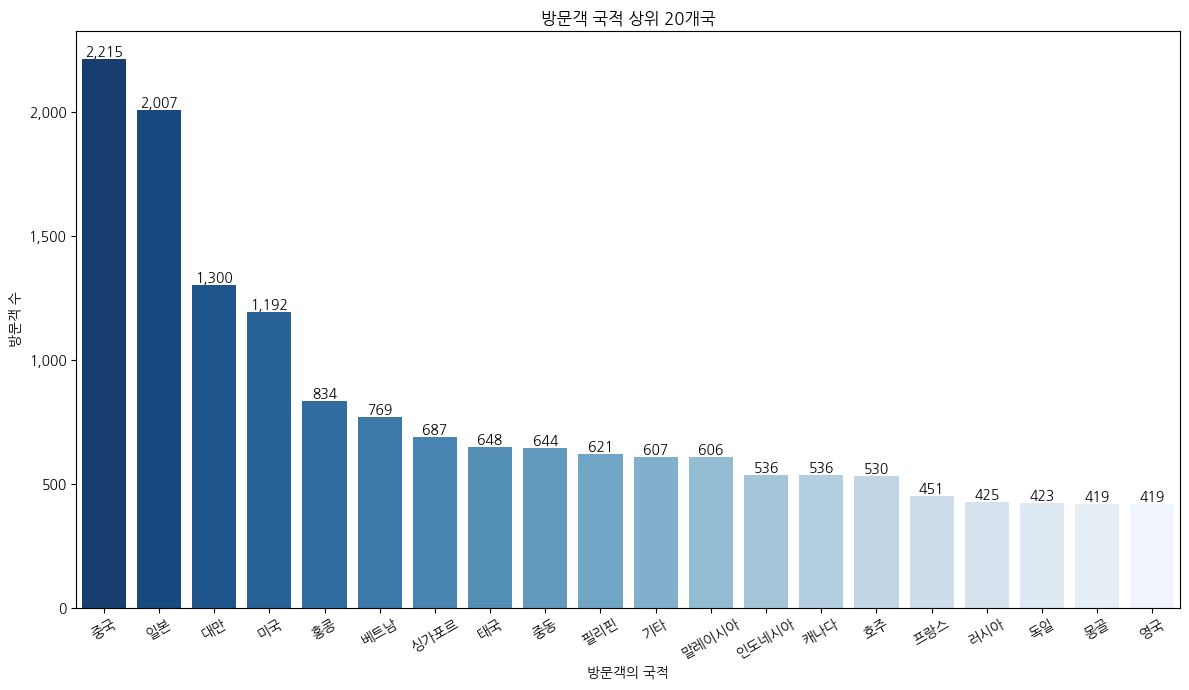

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1) 상위 20개 국적 코드별 방문객 수 집계
nat_counts = df['D_NAT'].value_counts().head(20)

# 2) 역순 팔레트 생성: 값이 클수록 더 진한 파란색
palette = sns.color_palette("Blues", n_colors=len(nat_counts))[::-1]

# 3) 수직 바 차트 그리기
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=nat_counts.index,
    y=nat_counts.values,
    palette=palette
)

# 4) 각 막대 위에 수치 표시
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x 위치: 바 중앙
        height,                              # y 위치: 바 꼭대기
        f'{int(height):,}',                  # 천 단위 구분 쉼표
        ha='center', va='bottom', fontsize=10
    )

# 5) y축 눈금에 천 단위 구분 쉼표 포맷 적용
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
)

plt.xlabel('방문객의 국적')
plt.ylabel('방문객 수')
plt.title('방문객 국적 상위 20개국')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### **국적별 방문객 성별 비중**

In [10]:
df['D_SEX'] = df['D_SEX'].str.replace(' ', '', regex=False)

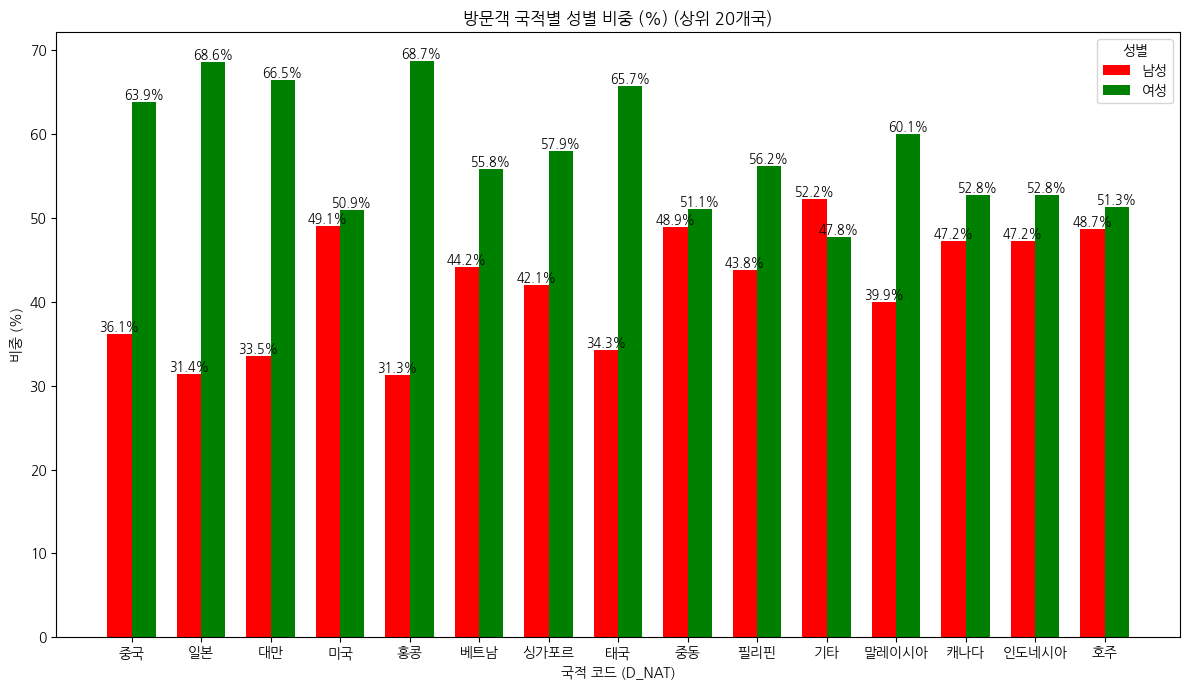

In [11]:
# 1) 국가-성별 방문객 수 집계 및 비율 계산
grouped = df.groupby(['D_NAT', 'D_SEX']).size().unstack(fill_value=0)
prop = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 2) 상위 20개국 추출
top20 = grouped.sum(axis=1).sort_values(ascending=False).head(15).index
prop_top = prop.loc[top20]

# 3) 성별 카테고리 추출 (예: 1=남성, 2=여성)
male_cat, female_cat = prop_top.columns.tolist()

# 4) 다중 막대 차트 그리기 (남성=red, 여성=green)
ind = np.arange(len(prop_top))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars_m = ax.bar(ind - width/2, prop_top[male_cat], width, color='red',   label='남성')
bars_f = ax.bar(ind + width/2, prop_top[female_cat], width, color='green', label='여성')

# 5) 각 막대 위에 비율 텍스트 표시
for bar in bars_m + bars_f:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,  # x 중앙
        h,                                 # y = 막대 높이
        f'{h:.1f}%',                       # 소수 첫째자리
        ha='center', va='bottom', fontsize=9
    )

# 6) 레이블·타이틀 설정
ax.set_xlabel('국적 코드 (D_NAT)')
ax.set_ylabel('비중 (%)')
ax.set_title('방문객 국적별 성별 비중 (%) (상위 20개국)')
ax.set_xticks(ind)
ax.set_xticklabels(prop_top.index, rotation=0)
ax.legend(title='성별')

plt.tight_layout()
plt.show()

### **상위 20개국 중 성별 차이 막대 그래프**

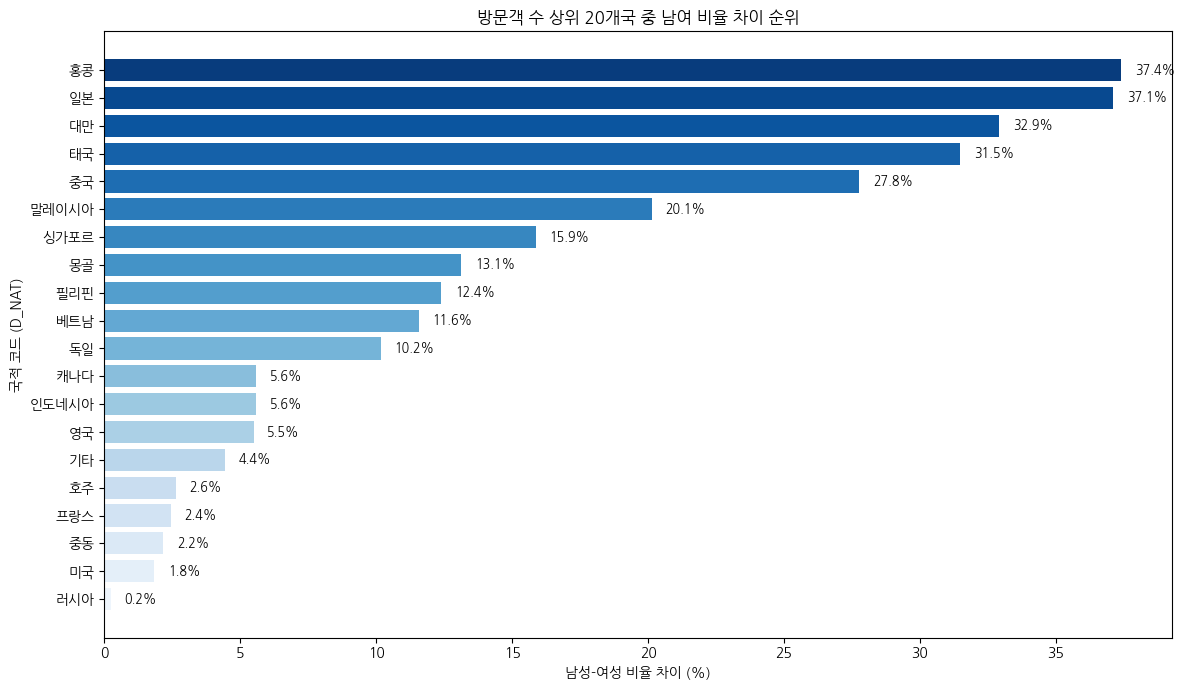

In [12]:
# 1) 국가·성별 방문객 수 집계 및 비율 계산
grouped = df.groupby(['D_NAT','D_SEX']).size().unstack(fill_value=0)
prop = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 2) 방문객 수 상위 20개국 추출
top20 = grouped.sum(axis=1).sort_values(ascending=False).head(20).index
prop_top20 = prop.loc[top20]

# 3) 남성-여성 비율 차이 계산
prop_top20['diff'] = (prop_top20.iloc[:,0] - prop_top20.iloc[:,1]).abs()

# 4) 차이 순 정렬
prop_sorted = prop_top20.sort_values('diff', ascending=False)

# 5) 그라데이션 팔레트 준비 (diff 값 크기 순)
#    큰 값에 진한 색이 오도록 Blues_r 팔레트를 사용
n = len(prop_sorted)
palette = sns.color_palette("Blues_r", n_colors=n)

# 6) 수평 바 차트 그리기
plt.figure(figsize=(12, 7))
ax = plt.barh(
    y=prop_sorted.index.astype(str),
    width=prop_sorted['diff'],
    color=palette
)

# 7) 막대 끝에 수치(%) 표시
for i, (idx, row) in enumerate(prop_sorted.iterrows()):
    diff_val = row['diff']
    # x 위치: 막대 길이 + 오프셋
    ax = plt.gca()  # current axes
    ax.text(
        diff_val + 0.5,          # x
        i,                       # y (index position)
        f'{diff_val:.1f}%',      # label
        va='center',
        ha='left',
        fontsize=9
    )

# 8) 레이블·타이틀 설정
plt.xlabel('남성-여성 비율 차이 (%)')
plt.ylabel('국적 코드 (D_NAT)')
plt.title('방문객 수 상위 20개국 중 남여 비율 차이 순위')
plt.gca().invert_yaxis()  # 상위 차이가 큰 국가를 위로
plt.tight_layout()
plt.show()

#### **도출!**
- 홍콩(68.7%)과 일본(68.6%)이 제일 차이가 큰 국가.
- 여성 비중이 제일 높은 나라가 홍콩과 일본 > 이는 곧 큰 성별차이를 야기했다고 판단.
- 미국은 방문국가 4위에 해당하지만 성별차이가 크지 않음. (1.8%)

## **월별 방문객**

### **월별 방문객 추이 (전체)**
- 10월이 가장 높은 방문수를 보임
- 앞선 시기보다 환율이 상승한 영향이 있어보임!


In [13]:
df['D_MON'] = df['D_MON'].str.replace(' ', '', regex=False)

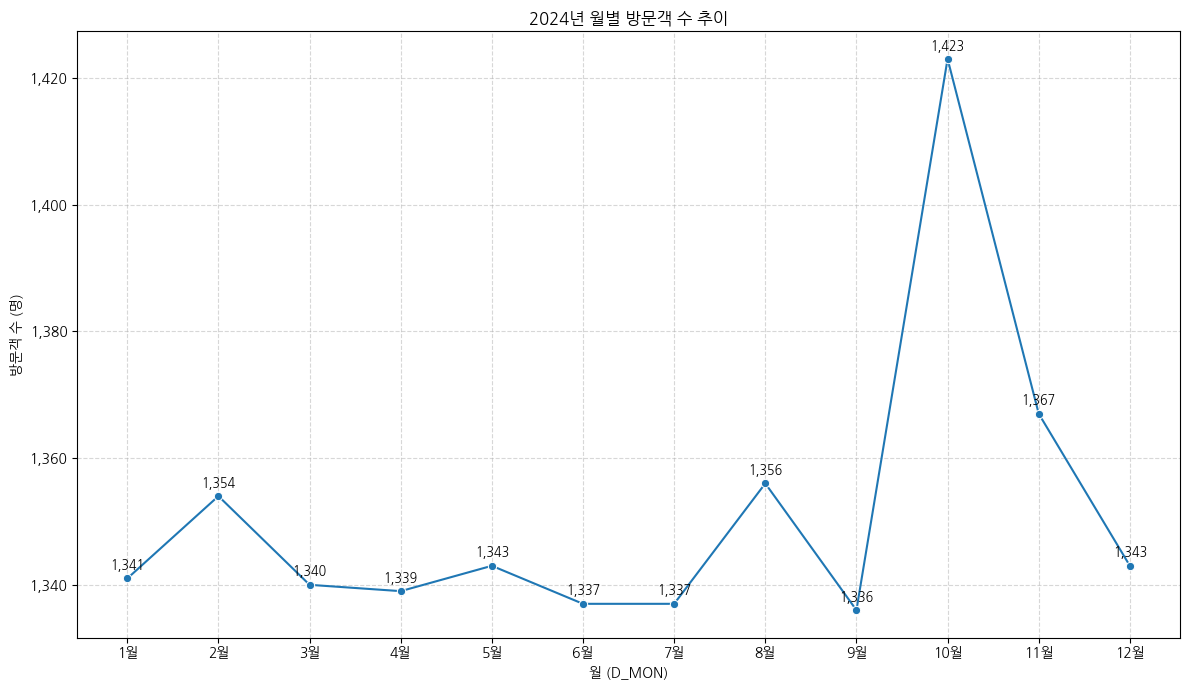

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1) '1월' → 숫자 추출
df['D_MON_num'] = df['D_MON'].astype(str).str.extract(r'(\d+)')[0].astype(int)

# 2) 1~12월 순 집계
monthly = (
    df['D_MON_num']
    .value_counts()
    .sort_index()
    .reindex(range(1, 13), fill_value=0)
)

# 3) 선그래프
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(x=monthly.index, y=monthly.values, marker='o', ax=ax)

# x축 레이블을 '1월', '2월', ... 로
ax.set_xticks(monthly.index)
ax.set_xticklabels([f"{m}월" for m in monthly.index])

# 4) 각 점 위에 수치 표시
for x, y in zip(monthly.index, monthly.values):
    ax.text(x, y+1, f'{y:,}', ha='center', va='bottom', fontsize=9)

ax.grid(which='major', axis='both', linestyle='--', alpha=0.5)

# 5) 레이블·타이틀
ax.set_xlabel('월 (D_MON)')
ax.set_ylabel('방문객 수 (명)')
ax.set_title('2024년 월별 방문객 수 추이')

# 6) x축 눈금 설정
ax.set_xticks(monthly.index)

# 7) y축 천단위 쉼표 포맷
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda val, pos: f'{int(val):,}')
)

plt.tight_layout()
plt.show()


### **분기별 방문객 추이**
- 10월에 높은 방문객 수를 보였기 때문에 당연히 4분기가 제일 높을 수 밖에 없음

In [15]:
df['D_BUN'] = df['D_BUN'].str.replace(' ', '', regex=False)

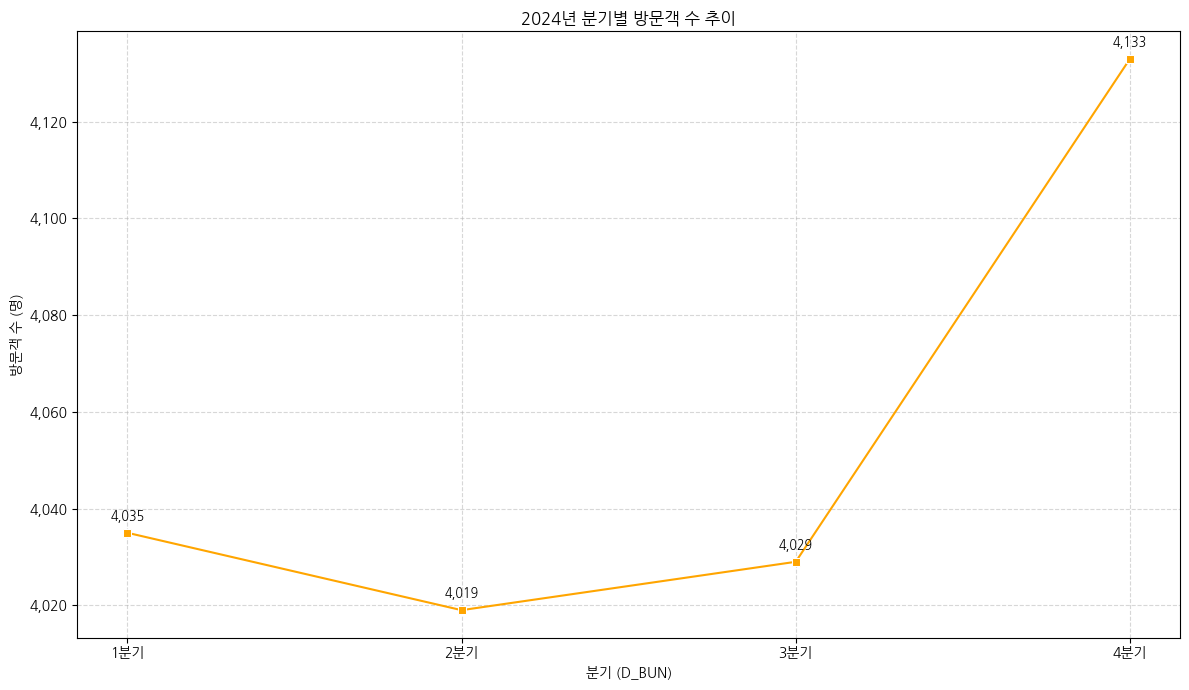

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
# 2) 분기별 방문객 수 추이

# 분기별 방문객 수 집계
quarterly = df['D_BUN'].value_counts().sort_index()

# 선그래프 그리기
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(
    x=quarterly.index,
    y=quarterly.values,
    marker='s',
    color='orange',
    ax=ax
)

# 각 점 위에 수치(천 단위 쉼표) 표시
for x, y in zip(quarterly.index, quarterly.values):
    ax.text(
        x, y+2,
        f'{y:,}',  # 천 단위 쉼표
        ha='center',
        va='bottom',
        fontsize=9
    )

# 축 레이블·타이틀 설정
ax.set_xlabel('분기 (D_BUN)')
ax.set_ylabel('방문객 수 (명)')  # 단위 '명' 추가
ax.set_title('2024년 분기별 방문객 수 추이')
ax.grid(which='major', axis='both', linestyle='--', alpha=0.5)

# x축 눈금 설정
ax.set_xticks(quarterly.index)

# y축 천 단위 쉼표 포맷 적용
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda val, pos: f'{int(val):,}')
)

plt.tight_layout()
plt.show()

### **상위 5개국별 월별 방문객 추이**

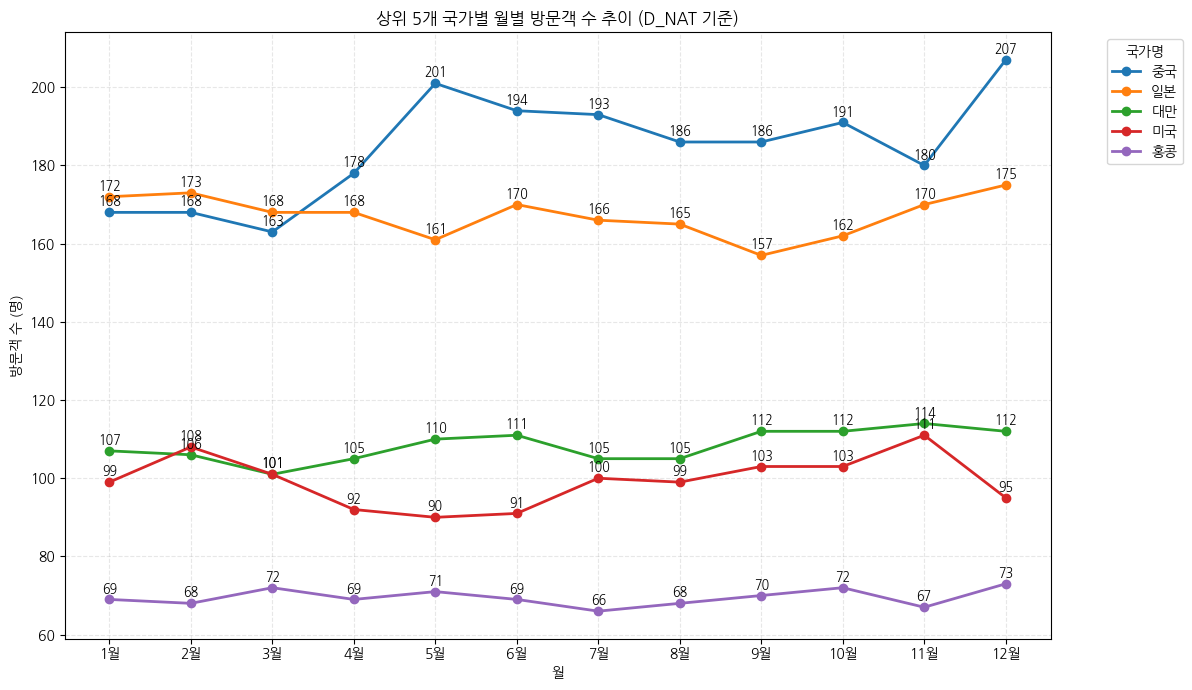

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1) D_MON에서 숫자만 추출해 정수형 month 컬럼 생성 (이미 수행했다면 생략)
df['month'] = df['D_MON'].astype(str).str.extract(r'(\d+)')[0].astype(int)

# 2) D_NAT별 월별 방문객 수 집계 (1~12월 보장)
nat_month = (
    df.groupby(['D_NAT', 'month'])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=range(1, 13), fill_value=0)
)

# 3) 방문객 수가 많은 상위 5개 국가 코드 추출
top_nat = nat_month.sum(axis=1).nlargest(5).index

# 4) 상위 5개 국가 월별 추이 그리기
plt.figure(figsize=(12, 7))
palette = sns.color_palette("tab10", n_colors=len(top_nat))

for i, code in enumerate(top_nat):
    series = nat_month.loc[code]
    plt.plot(
        series.index, series.values,
        marker='o', linewidth=2,
        color=palette[i],
        label=f'{code}'
    )
    # 각 점 위에 수치 표시
    for m, v in zip(series.index, series.values):
        if v > 0:
            plt.text(
                m, v+1,
                f'{v:,}',
                ha='center', va='bottom', fontsize=9
            )

# 5) 레이블·타이틀·눈금
plt.xlabel('월')
plt.ylabel('방문객 수 (명)')
plt.title('상위 5개 국가별 월별 방문객 수 추이 (D_NAT 기준)')
plt.xticks(range(1, 13), [f'{m}월' for m in range(1, 13)])

# 6) y축 천 단위 쉼표 포맷
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
)

# 7) 격자 추가
plt.grid(True, which='major', linestyle='--', alpha=0.3)

# 8) 범례
plt.legend(title='국가명', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [18]:
import plotly.express as px
import pandas as pd

# (1) 이미 구해둔 nat_month 와 top_nat 가 있다고 가정
# nat_month: D_NAT × month (1~12월) 집계 DF
# top_nat: 상위 5개 국가 코드 리스트

# (2) long 포맷으로 변환
df_line = (
    nat_month
    .loc[top_nat]                # 상위 5개국만
    .reset_index()               # D_NAT 을 컬럼으로
    .melt(id_vars='D_NAT',       # D_NAT, month, count 로
          var_name='month',
          value_name='count')
)

# (3) “1월” 레이블 추가
df_line['month_label'] = df_line['month'].astype(str) + '월'

# (4) Plotly Express 로 라인차트
fig = px.line(
    df_line,
    x='month_label',
    y='count',
    color='D_NAT',             # 국가별 색 분리
    markers=True,
    title='상위 5개 국가별 월별 방문객 수 추이 (D_NAT 기준)',
    labels={
        'month_label': '월',
        'count': '방문객 수 (명)',
        'D_NAT': '국가 코드'
    }
)

# (5) 툴팁에 천 단위 쉼표 포맷 적용
fig.update_traces(
    hovertemplate='%{y:,.0f}명<br>월: %{x}<extra></extra>'
)

# (6) y축도 천 단위 쉼표
fig.update_layout(
    yaxis_tickformat=',',
    xaxis_tickangle=-45,
    legend_title_text='국가 코드',
    margin=dict(l=60, r=200, t=60, b=60)
)

fig.show()


# **중국인 여성 타켓**

In [19]:
# 중국인 여성 응답자 수 계산
count_china_f = df[(df['D_NAT'] == '중국') & (df['D_SEX'] == '여성')].shape[0]
print(f"중국인 여성 응답자 수: {count_china_f:,}명")


중국인 여성 응답자 수: 1,415명


## **방한 목적**

### **방문 목적 막대그래프**

/tmp/ipython-input-20-1278198827.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




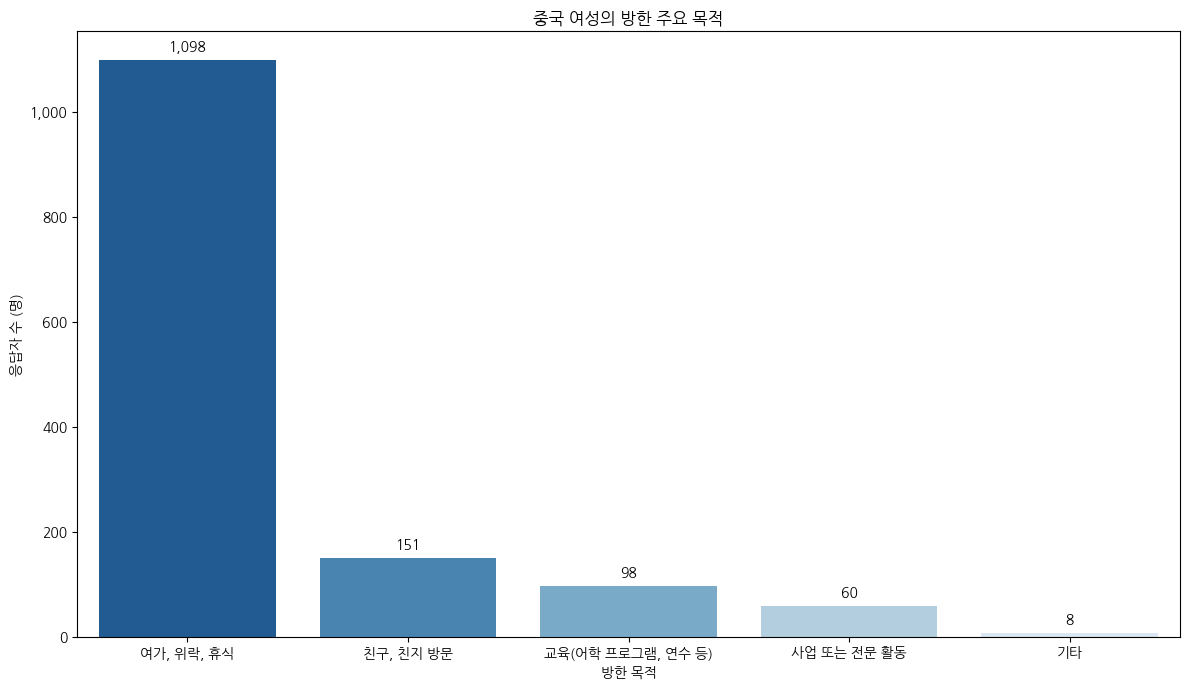

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 0) 중국인 여성 필터링
df_china_f = df[(df['D_NAT'] == '중국') & (df['D_SEX'] == '여성')]

# 1) Q1 분포 집계 및 내림차순 정렬
purpose_counts = df_china_f['Q1'].value_counts().sort_values(ascending=False)

# 2) 막대그래프
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=purpose_counts.index,
    y=purpose_counts.values,
    palette='Blues_r'
)

# 3) 막대 위 수치 표시
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + max(purpose_counts.values) * 0.01,
        f'{int(h):,}',
        ha='center', va='bottom',
        fontsize=10
    )

# 4) 레이블·타이틀·포맷
ax.set_xlabel('방한 목적')
ax.set_ylabel('응답자 수 (명)')
ax.set_title('중국 여성의 방한 주요 목적')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
)
plt.tight_layout()
plt.show()


###  **방문 목적 & 전반적 만족도**

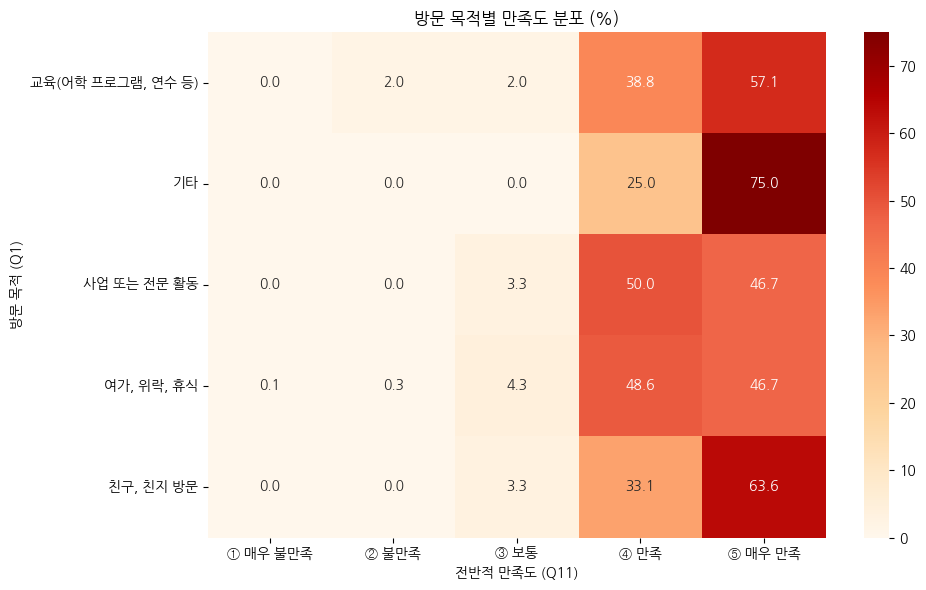

In [21]:
cross_q1_q11 = pd.crosstab(df_china_f['Q1'], df_china_f['Q11'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(cross_q1_q11, annot=True, fmt='.1f', cmap='OrRd')
plt.title('방문 목적별 만족도 분포 (%)')
plt.ylabel('방문 목적 (Q1)')
plt.xlabel('전반적 만족도 (Q11)')
plt.tight_layout()
plt.show()


#### **도출!**

**1. [만족 & 매우 만족 多]**
- 대부분의 방문 목적에서 ‘만족(④)’과 ‘매우 만족(⑤)’ 응답이 압도적으로 많다.

- 전체적으로 긍정적인 경험을 한 것으로 보임
- 특히 ‘사업/전문활동’, ‘교육’, ‘친구/친지 방문’ 목적에서도 ④·⑤ 응답이 80% 이상을 차지

<br>

**2.  [기타 목적 방문자는 8명]**
- ‘기타’ 목적 방문자는 가장 높은 ‘매우 만족’ 비율

- 기타 목적자 중 75.0%가 매우 만족
- 다만 표본 수가 적을 가능성도 크므로 절대 수치 확인 필요
- 비주류 목적 방문자일수록 만족도 편차가 클 수 있음

<br>

**3. [친구·친지 방문 목적 방문자는 151명]**
- ‘친구·친지 방문’ 목적자의 만족도가 유독 높다

- 63.6%가 ‘매우 만족’, 33.1%가 ‘만족’ → 총 96.7%가 긍정
- 이는 정서적 목적과 기대 충족도가 높았을 가능성 시사

<br>

**4. [여가/위락/휴식 목적 방문자는 1,098명]**
- ‘여가/위락/휴식’ 목적자 만족도는 의외로 평이하다

- ‘매우 만족’ 46.7%, ‘만족’ 48.6% → 가장 많은 방문 목적일 가능성이 있지만
- 다른 항목에 비해 ‘보통’ 이하 응답이 존재함
- 여가 목적 방문자의 기대치가 높거나, 일부 만족을 못한 경우도 존재

<br>

**5. [교육 목적 방문자는 98명]**
- ‘교육’ 목적은 만족도 대비 ‘보통’ 비율이 상대적으로 있음

- ③ 보통: 2.0%, ④ 만족: 38.8%, ⑤ 매우 만족: 57.1%
- 업무나 교육 목적자는 여가 목적자보다 약간 낮은 만족도 패턴

### **방문 목적 & 재방문의사**

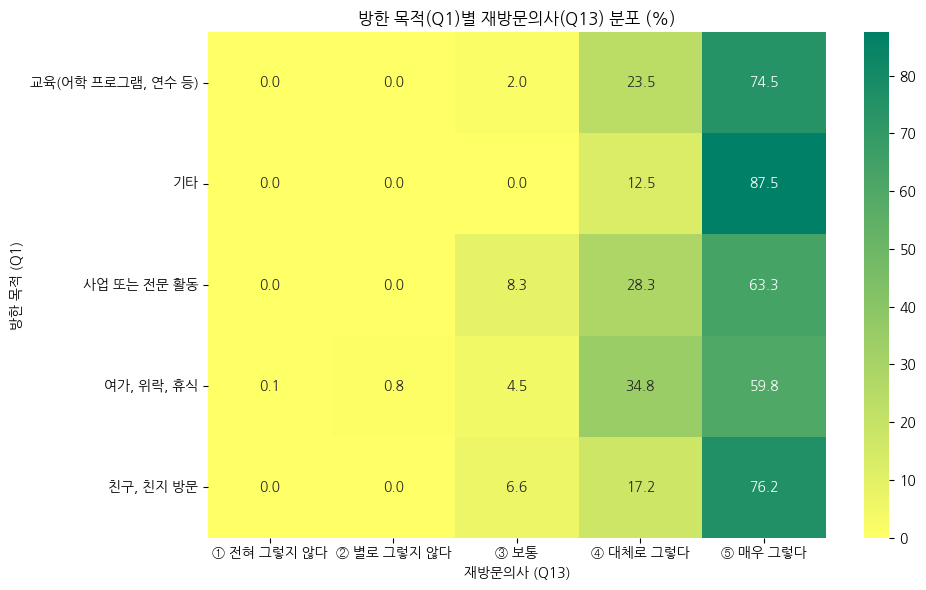

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 교차표 생성
cross_q1_q13 = pd.crosstab(
    df_china_f['Q1'],
    df_china_f['Q13'],
    normalize='index'
) * 100

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_q1_q13, annot=True, fmt='.1f', cmap='summer_r')
plt.title('방한 목적(Q1)별 재방문의사(Q13) 분포 (%)')
plt.xlabel('재방문의사 (Q13)')
plt.ylabel('방한 목적 (Q1)')
plt.tight_layout()
plt.show()


#### **도출!**

**1. [재방문 의사 高]**
- 전체적으로 재방문의사 긍정 비율(④+⑤)이 매우 높음

- 모든 방문 목적에서 90% 이상이 "재방문할 의향이 있다"고 응답
- 이는 한국 여행 전반에 대한 매우 긍정적인 인식을 반영

<br>

**2. [여가 목적 방문자는 1,098명]**
-  ‘여가/휴식’ 목적은 기대보다 ‘매우 그렇다’ 비중이 낮음 (59.8%)

- ④·⑤ 합계는 높지만, 상대적으로 "압도적 긍정"이 적다
- 즉, 대체로 좋았지만, 아주 인상 깊은 경험은 적을 수도 있음
- → 관광지의 서비스 품질, 다양성, 감동 포인트 강화 필요


<br>

**3. [친지 방문 목적 방문자는 151명]**
-  ‘친지 방문’ 목적자는 ⑤ 비율이 특히 높음 (76.2%)

- 감정적 유대와 정서적 안정성이 높은 만족도를 만든 것으로 추정됨
- 이 집단은 재방문 의향과 입소문 확산 가능성 모두 높음

<br>

**4. [교육 목적 방문자는 98명]**
- ‘교육 목적’ 방문자도 매우 높은 재방문 의향

- 98%가 재방문 의향 (④+⑤)
- 장기 체류 경험, 개인 목표 달성 경험 등이 긍정적 영향을 미쳤을 가능성
- → 유학생 유치 및 교육 관광 전략 강화 타당

<br>


**6. [사업 목적 방문자는 60명 ]**
-  ‘사업/전문활동’ 방문자도 꽤 높은 재방문 의향

- ⑤ 매우 그렇다 비율이 63.3%
- → MICE, 비즈니스 관광의 가능성도 긍정적

<br>

**7. [기타 목적 방문자는 8명]**
- 기타 목적’ 방문자의 충성도는 독보적

- **87.5%가 ‘매우 그렇다’**고 응답 → 가장 강한 재방문 의사
- 기타 목적은 의료, 종교, 봉사 등 특별 목적일 가능성이 높음
- → 해당 집단은 만족도가 높고, 재방문 의향도 매우 확고함
- → 특수 목적 관광을 전략적으로 확대할 근거


### **방문 목적 & 추천 의향**

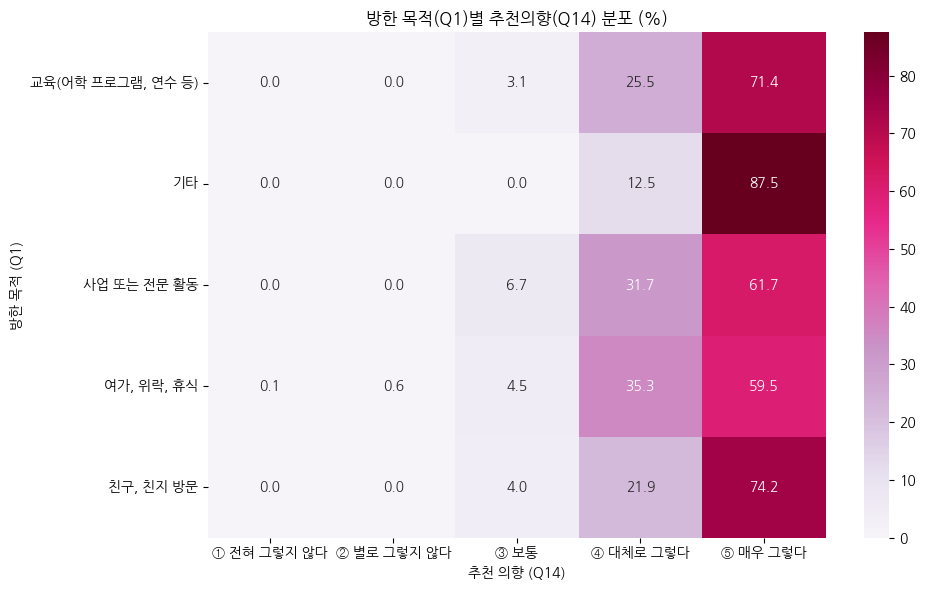

In [23]:
# 교차표 생성
cross_q1_q14 = pd.crosstab(
    df_china_f['Q1'],
    df_china_f['Q14'],
    normalize='index'
) * 100

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_q1_q14, annot=True, fmt='.1f', cmap='PuRd')
plt.title('방한 목적(Q1)별 추천의향(Q14) 분포 (%)')
plt.xlabel('추천 의향 (Q14)')
plt.ylabel('방한 목적 (Q1)')
plt.tight_layout()
plt.show()


### **방문 목적별 1인 총 지출금액**

/tmp/ipython-input-24-2696320755.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




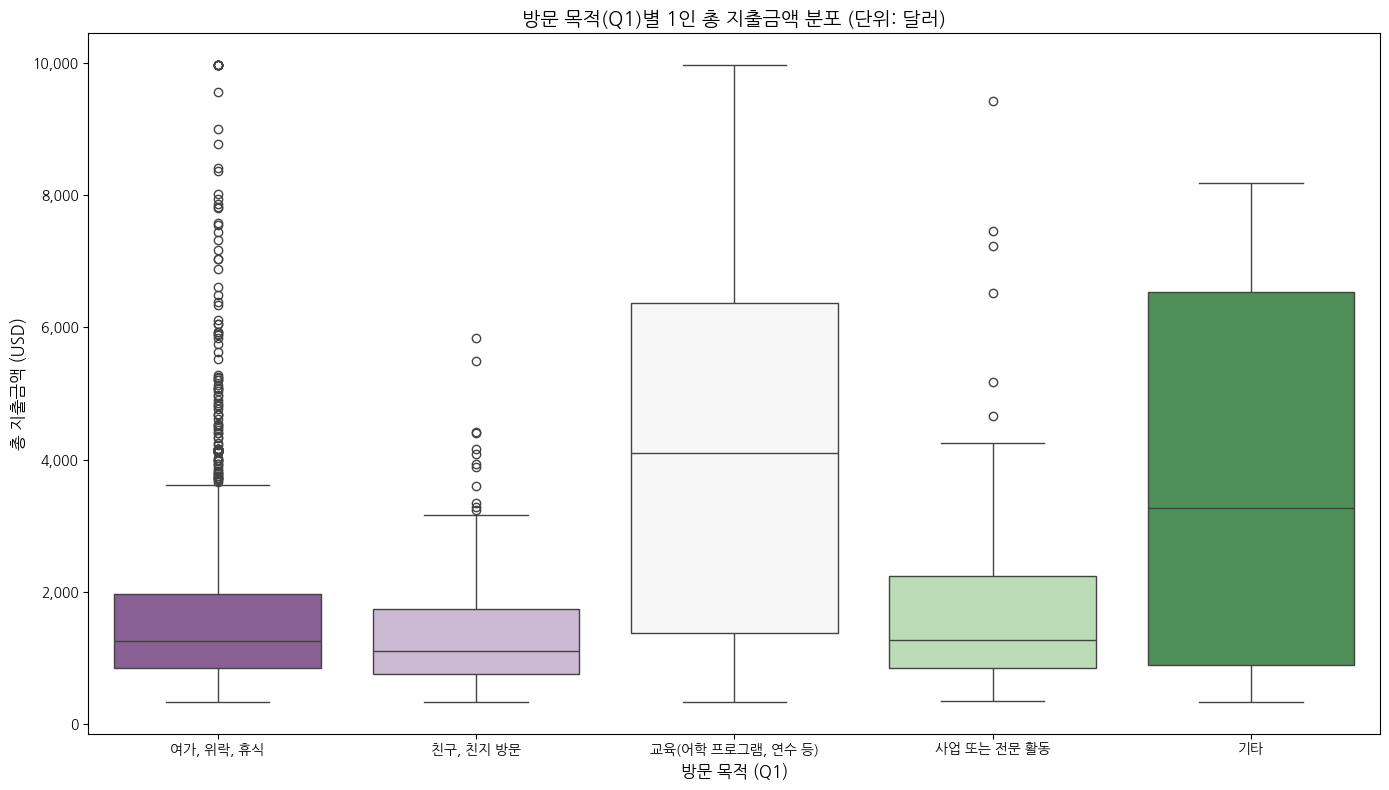

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. 필터: 총액 변수와 Q1 있는 행만 사용 (결측치 제거)
plot_df = df_china_f[['Q1', '총액1인TOT2']]

# 2. 시각화: boxplot
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Q1', y='총액1인TOT2', data=plot_df, palette='PRGn')

# 3. 축 레이블 및 타이틀
ax.set_title('방문 목적(Q1)별 1인 총 지출금액 분포 (단위: 달러)', fontsize=14)
ax.set_xlabel('방문 목적 (Q1)', fontsize=12)
ax.set_ylabel('총 지출금액 (USD)', fontsize=12)

# 4. y축 숫자 콤마 포맷
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 5. x축 회전
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### **방문 목적별 1인당 총 지출금액 평균**

/tmp/ipython-input-25-1141363699.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




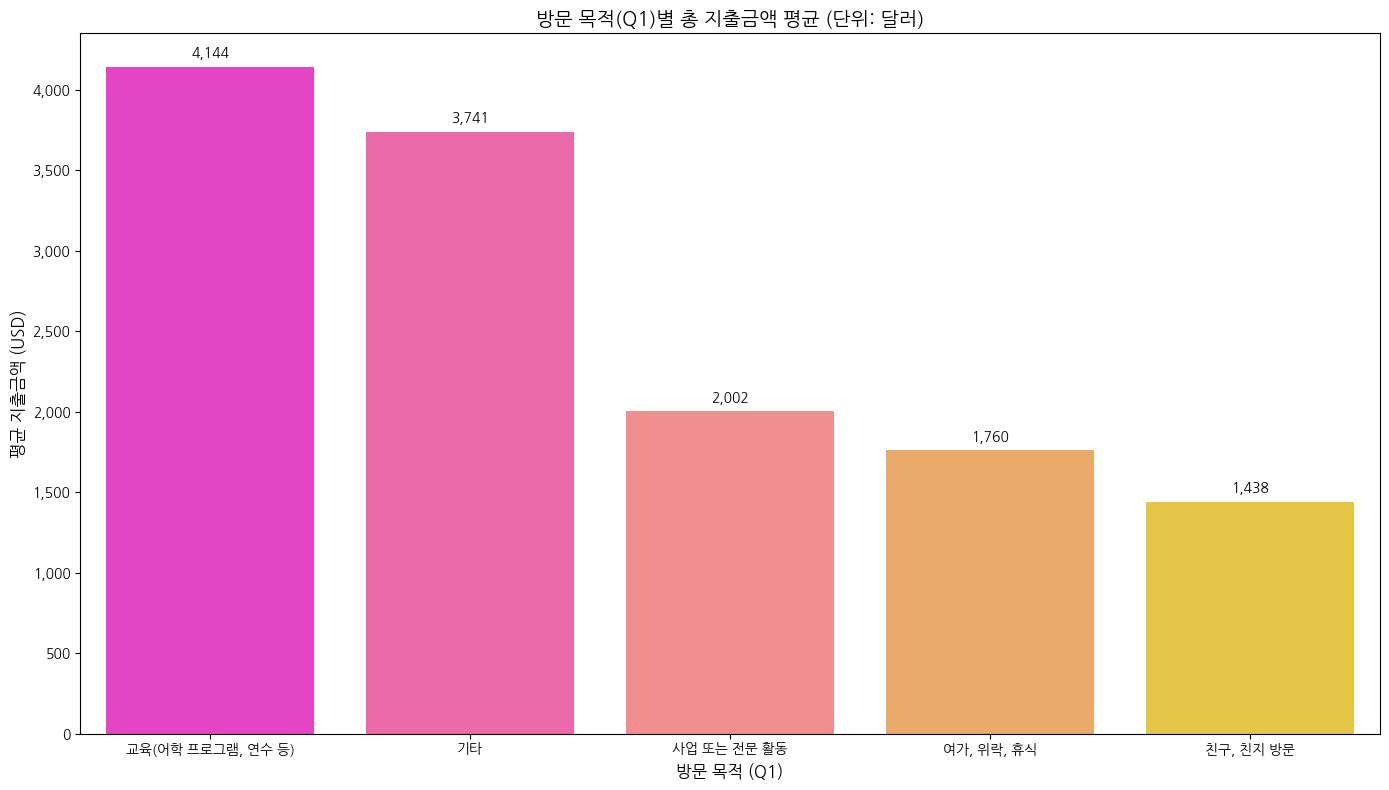

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. Q1별 평균 지출금액 계산
avg_spending_by_q1 = df_china_f.groupby('Q1')['총액1인TOT2'].mean().sort_values(ascending=False)

# 2. 시각화
plt.figure(figsize=(14, 8))  # ⬅︎ 그래프 크기 키움
ax = sns.barplot(x=avg_spending_by_q1.index, y=avg_spending_by_q1.values, palette='spring')

# 3. 수치 라벨 표시
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(avg_spending_by_q1.values) * 0.01,
        f'{int(height):,}',  # 천단위 콤마 포함
        ha='center', va='bottom',
        fontsize=10
    )

# 4. 축/타이틀 설정
ax.set_title('방문 목적(Q1)별 총 지출금액 평균 (단위: 달러)', fontsize=14)
ax.set_xlabel('방문 목적 (Q1)', fontsize=12)
ax.set_ylabel('평균 지출금액 (USD)', fontsize=12)

# 5. y축 콤마 포맷터
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 6. x축 회전
plt.xticks(rotation=0)  # 또는 90도 → rotation=90

plt.tight_layout()
plt.show()


#### **도출!**

1. 환산
- 4,144 달러 = 564 만원
- 3,741 달러 = 509 만원
- 2,002 달러 = 273 만원
- 1,760 달러 = 240 만원
- 1,438 달러 = 196 만원

## **한국여행 관심 계기**

/tmp/ipython-input-26-655215809.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




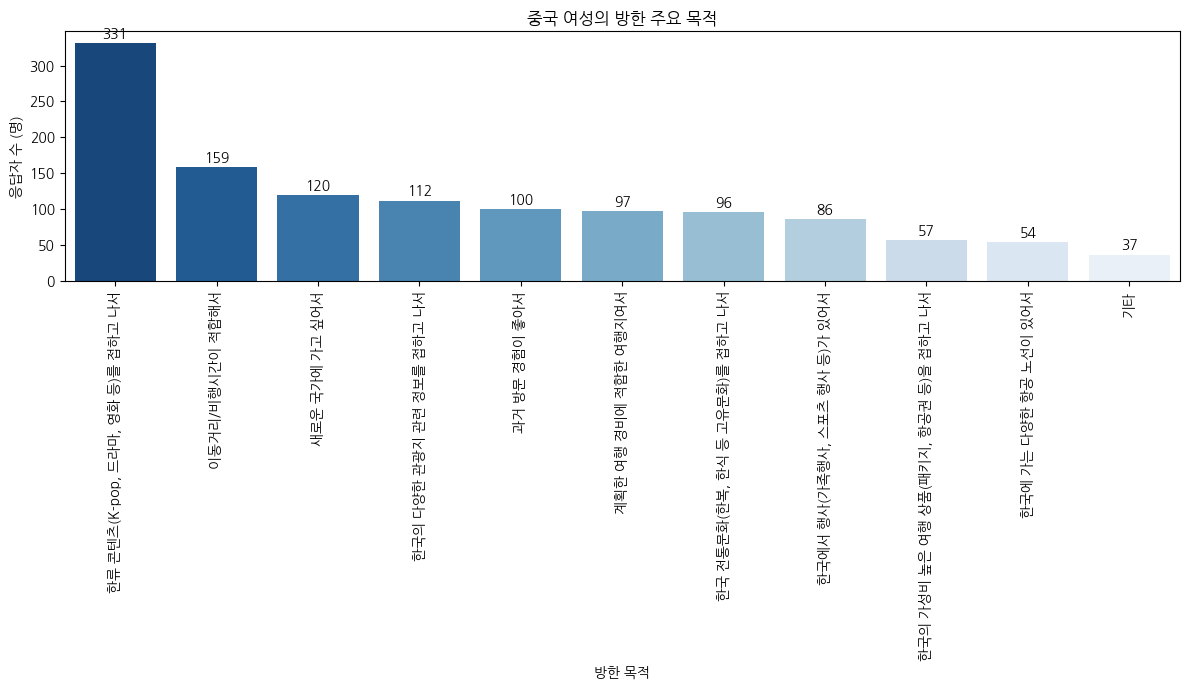

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 0) 중국인 여성 필터링
df_china_f = df[(df['D_NAT'] == '중국') & (df['D_SEX'] == '여성')]

# 1) Q1 분포 집계 및 내림차순 정렬
purpose_counts = df_china_f['Q1_1a1'].value_counts().sort_values(ascending=False)

# 2) 막대그래프
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=purpose_counts.index,
    y=purpose_counts.values,
    palette='Blues_r'
)

# 3) 막대 위 수치 표시
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + max(purpose_counts.values) * 0.01,
        f'{int(h):,}',
        ha='center', va='bottom',
        fontsize=10
    )

# 4) 레이블·타이틀·포맷
ax.set_xlabel('방한 목적')
ax.set_ylabel('응답자 수 (명)')
ax.set_title('중국 여성의 방한 주요 목적')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-27-2403541214.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




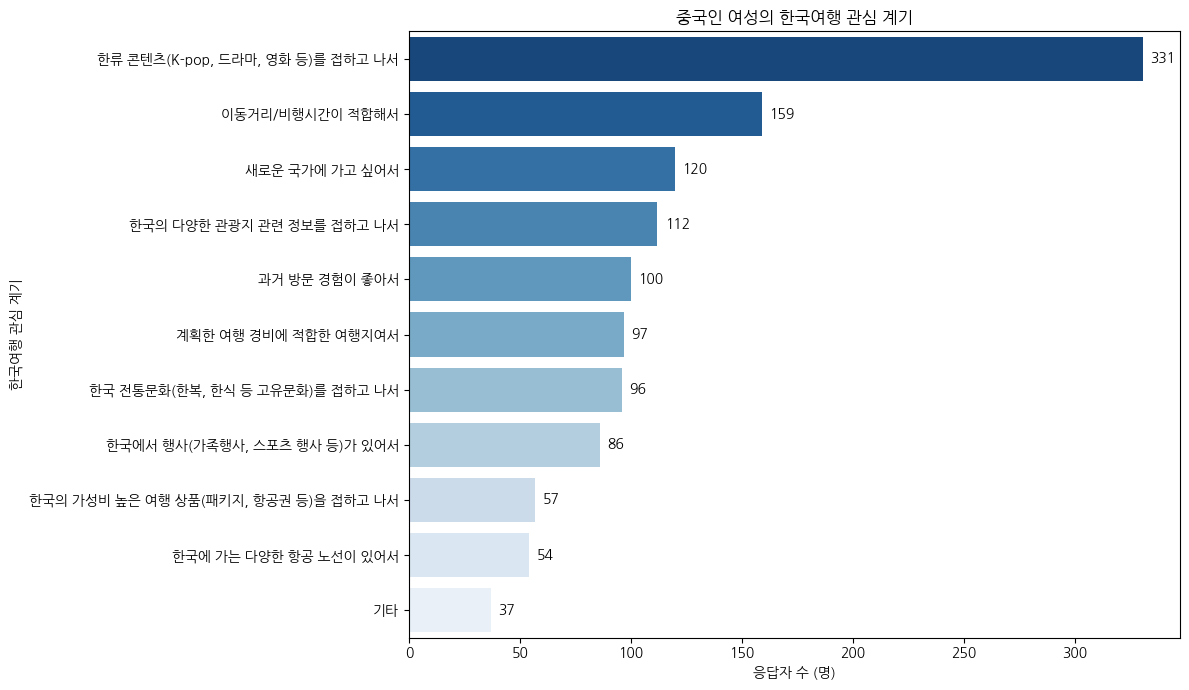

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 0) 중국인 여성 필터링
df_china_f = df[(df['D_NAT'] == '중국') & (df['D_SEX'] == '여성')]

# 1) Q1 분포 집계 및 내림차순 정렬
purpose_counts = df_china_f['Q1_1a1'].value_counts().sort_values(ascending=False)

# 2) 가로 막대그래프
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    y=purpose_counts.index,
    x=purpose_counts.values,
    palette='Blues_r'
)

# 3) 막대 옆에 수치 표시
for bar in ax.patches:
    w = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        w + max(purpose_counts.values) * 0.01,  # x좌표: 막대 끝 + 여유
        y,                                     # y좌표: 막대 중앙
        f'{int(w):,}',
        va='center', ha='left',
        fontsize=10
    )

# 4) 레이블·타이틀·포맷
ax.set_ylabel('한국여행 관심 계기')
ax.set_xlabel('응답자 수 (명)')
ax.set_title('중국인 여성의 한국여행 관심 계기')
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
)
plt.tight_layout()
plt.show()


#### **한국여행 관심 계기 & 전반적 만족도**

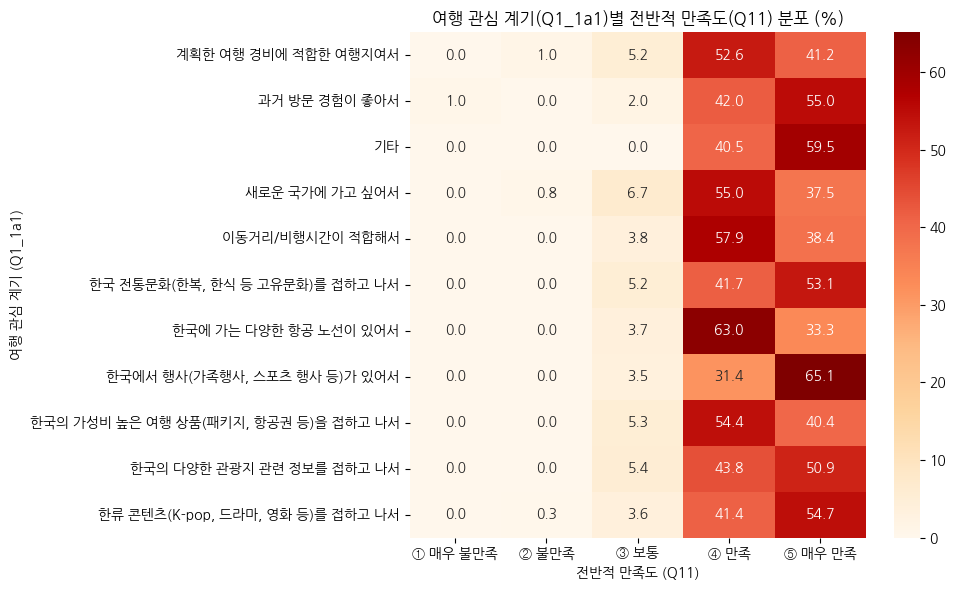

In [28]:
cross_q1a1_q11 = pd.crosstab(df_china_f['Q1_1a1'], df_china_f['Q11'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(cross_q1a1_q11, annot=True, fmt='.1f', cmap='OrRd')
plt.title('여행 관심 계기(Q1_1a1)별 전반적 만족도(Q11) 분포 (%)')
plt.ylabel('여행 관심 계기 (Q1_1a1)')
plt.xlabel('전반적 만족도 (Q11)')
plt.tight_layout()
plt.show()


### **한국여행 관심 계기 & 재방문의사**

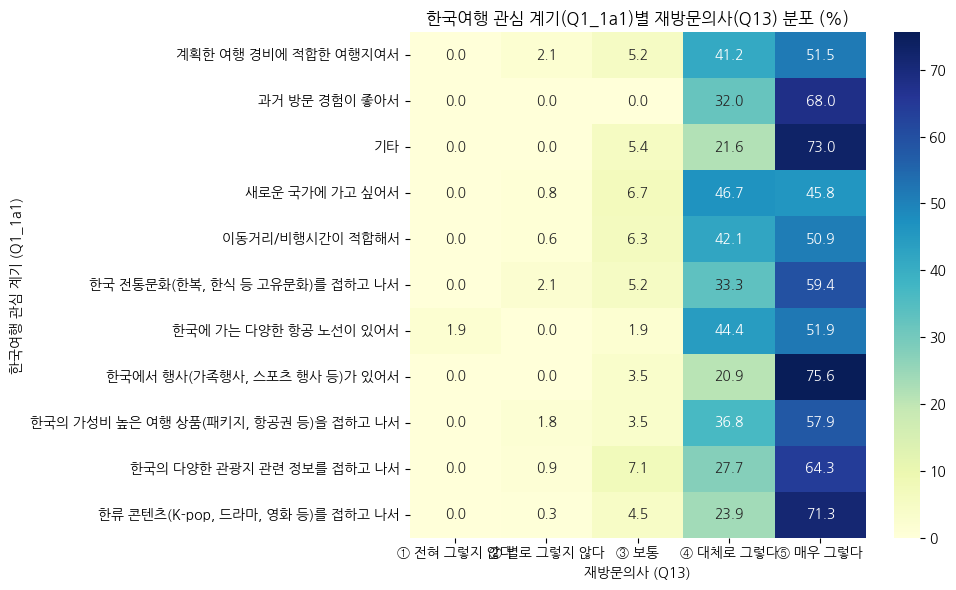

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 교차표 생성: 행 = 방문 목적(Q1), 열 = 재방문의사(Q13), 퍼센트 기준
cross_q11a1_q13 = pd.crosstab(df_china_f['Q1_1a1'], df_china_f['Q13'], normalize='index') * 100

# 2. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_q11a1_q13, annot=True, fmt='.1f', cmap='YlGnBu')  # 예: summer_r → YlGnBu로 대체
plt.title('한국여행 관심 계기(Q1_1a1)별 재방문의사(Q13) 분포 (%)')
plt.xlabel('재방문의사 (Q13)')
plt.ylabel('한국여행 관심 계기 (Q1_1a1)')
plt.tight_layout()
plt.show()


### **한국여행 관심 계기 & 추천 의향**



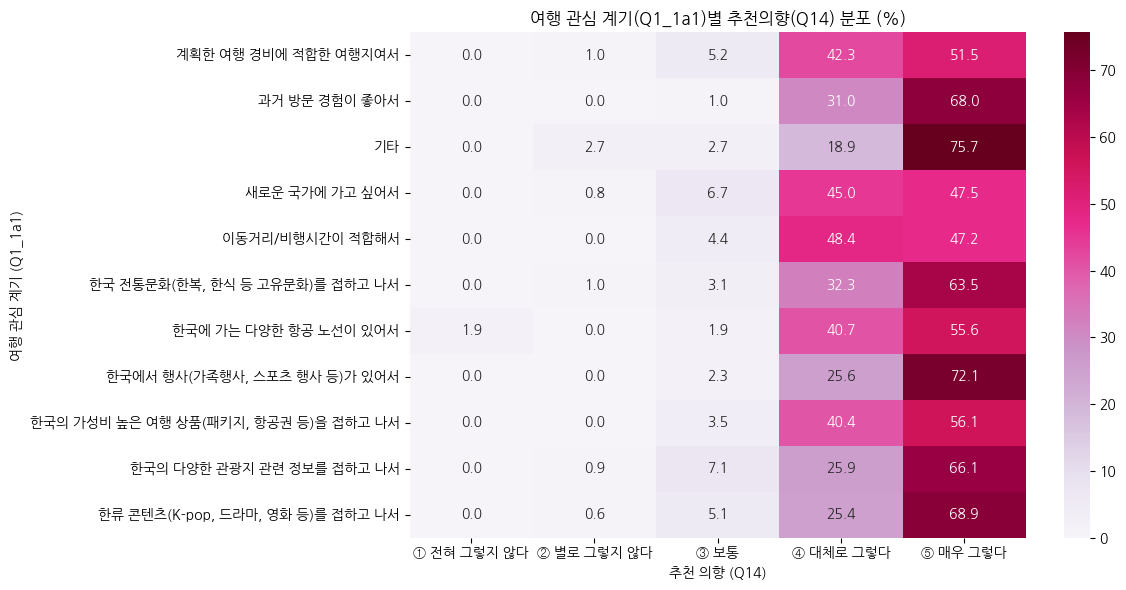

In [30]:
cross_q1a1_q14 = pd.crosstab(df_china_f['Q1_1a1'], df_china_f['Q14'], normalize='index') * 100

plt.figure(figsize=(12, 6))
sns.heatmap(cross_q1a1_q14, annot=True, fmt='.1f', cmap='PuRd')
plt.title('여행 관심 계기(Q1_1a1)별 추천의향(Q14) 분포 (%)')
plt.xlabel('추천 의향 (Q14)')
plt.ylabel('여행 관심 계기 (Q1_1a1)')
plt.tight_layout()
plt.show()


### **한국여행 관심 계기별 1인 총 지출금액**



/tmp/ipython-input-31-1080834532.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




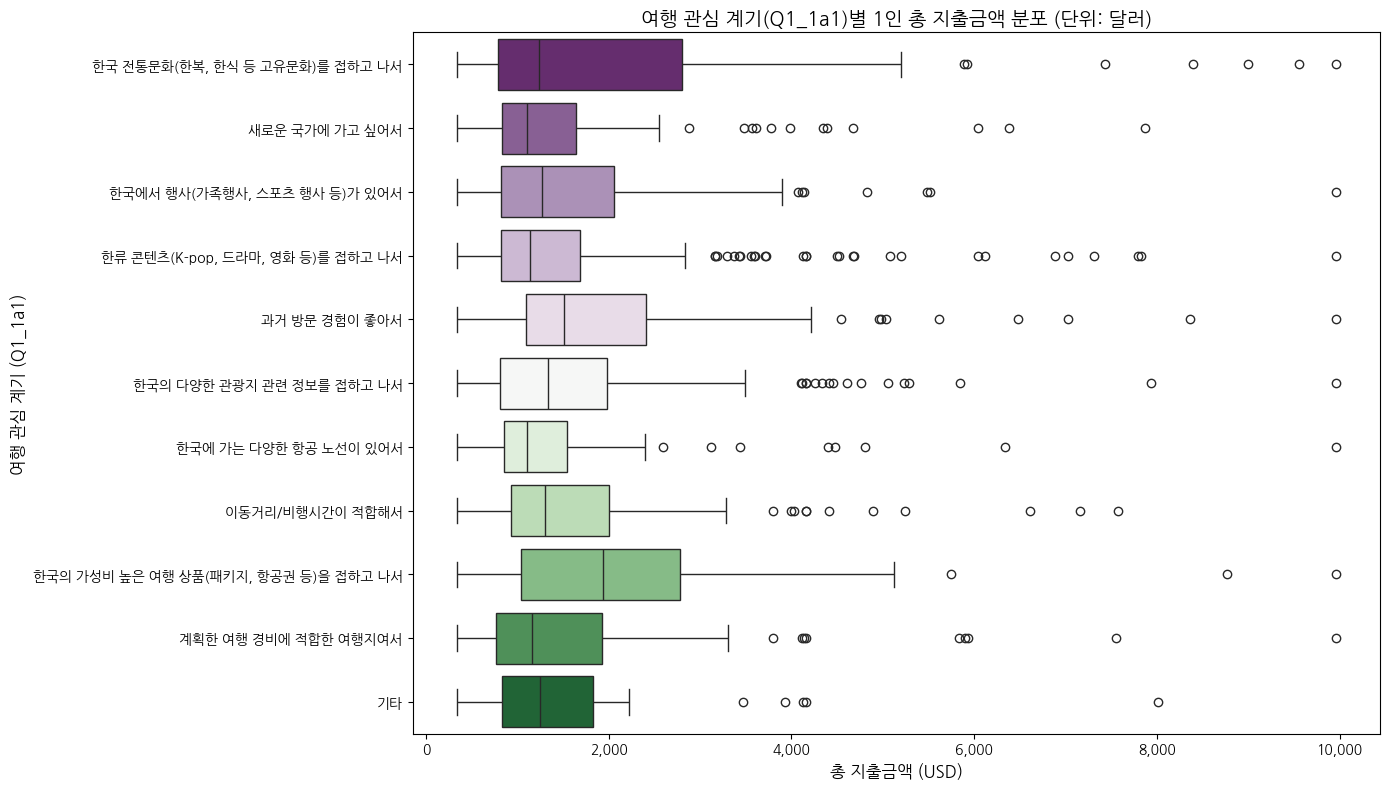

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. 결측치 제거
plot_df = df_china_f[['Q1_1a1', '총액1인TOT2']]

# 2. 박스플롯 (가로형)
plt.figure(figsize=(14, 8))
ax = sns.boxplot(y='Q1_1a1', x='총액1인TOT2', data=plot_df, palette='PRGn')

# 3. 제목 및 라벨
ax.set_title('여행 관심 계기(Q1_1a1)별 1인 총 지출금액 분포 (단위: 달러)', fontsize=14)
ax.set_xlabel('총 지출금액 (USD)', fontsize=12)
ax.set_ylabel('여행 관심 계기 (Q1_1a1)', fontsize=12)

# 4. x축 콤마 포맷
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


### **한국여행 관심 계기별 1인당 총 지출금액 평균**

/tmp/ipython-input-32-944416573.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




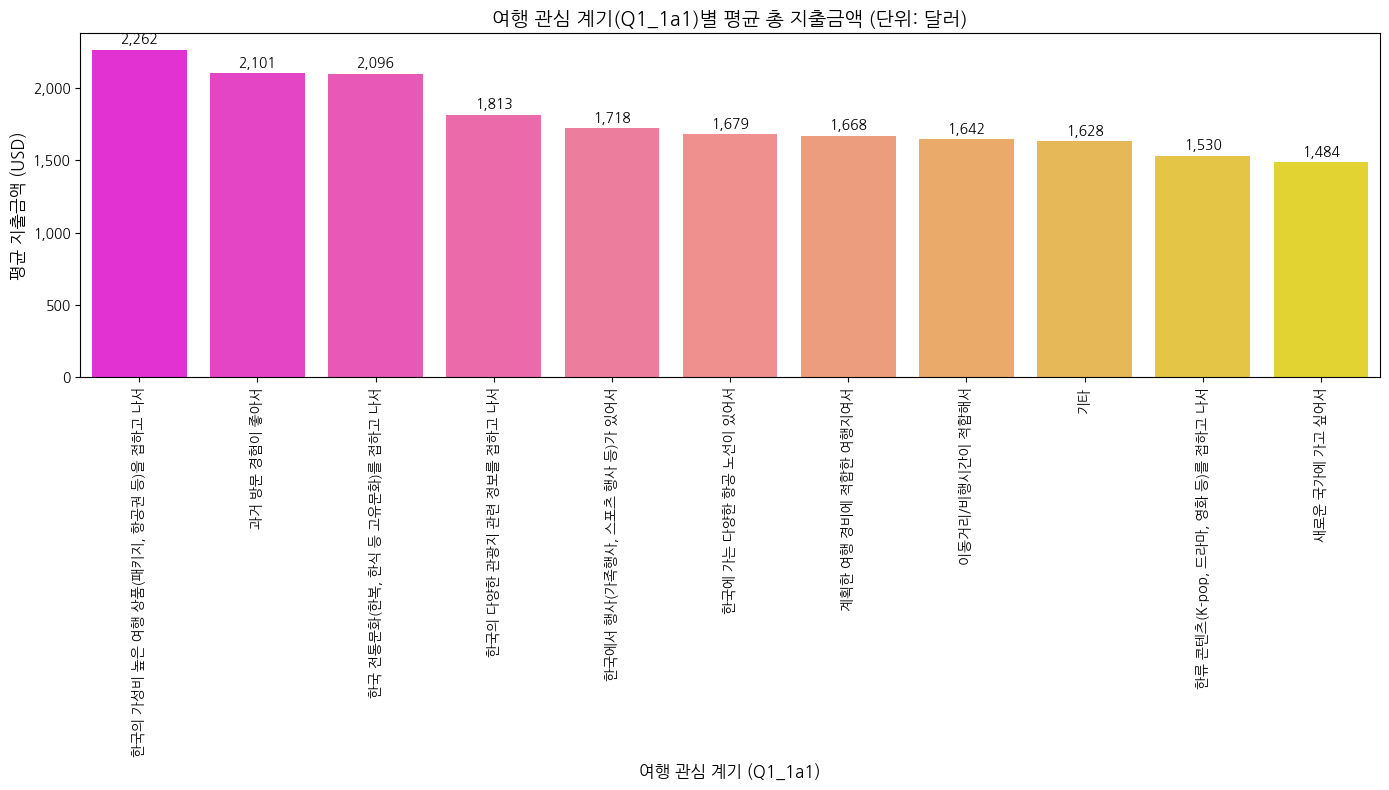

In [32]:
avg_spending_by_q1a1 = df_china_f.groupby('Q1_1a1')['총액1인TOT2'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=avg_spending_by_q1a1.index, y=avg_spending_by_q1a1.values, palette='spring')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(avg_spending_by_q1a1.values) * 0.01,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=10
    )

ax.set_title('여행 관심 계기(Q1_1a1)별 평균 총 지출금액 (단위: 달러)', fontsize=14)
ax.set_xlabel('여행 관심 계기 (Q1_1a1)', fontsize=12)
ax.set_ylabel('평균 지출금액 (USD)', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-33-1516173212.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




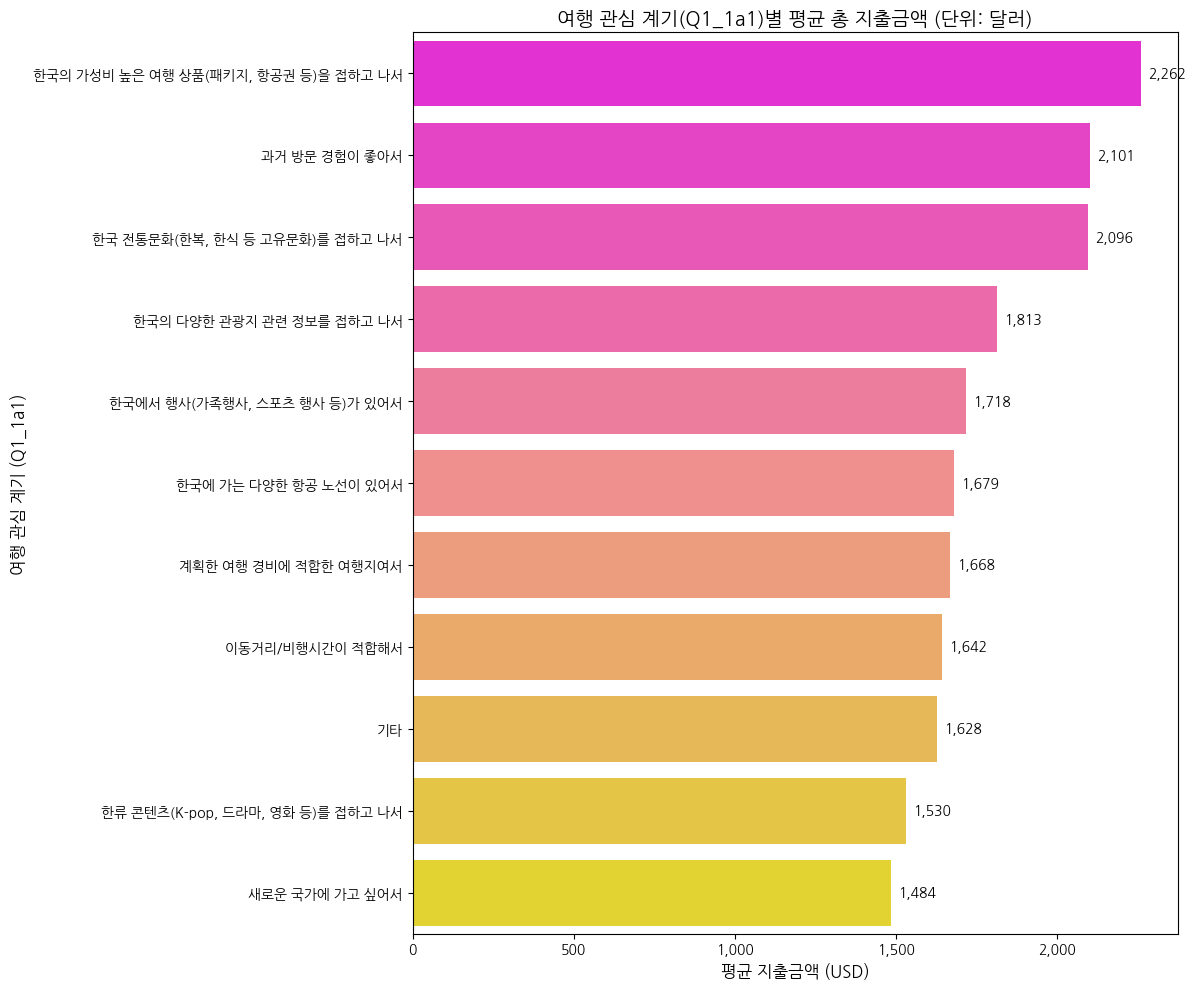

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 평균 계산
avg_spending_by_q1a1 = df_china_f.groupby('Q1_1a1')['총액1인TOT2'].mean().sort_values(ascending=False)  # ⬅︎ 수평은 아래부터 쌓이므로 오름차순

# 시각화
plt.figure(figsize=(12, 10))
ax = sns.barplot(y=avg_spending_by_q1a1.index, x=avg_spending_by_q1a1.values, palette='spring')

# 텍스트 라벨 표시
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + max(avg_spending_by_q1a1.values) * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{int(width):,}',
        ha='left', va='center',
        fontsize=10
    )

# 타이틀 및 축 레이블
ax.set_title('여행 관심 계기(Q1_1a1)별 평균 총 지출금액 (단위: 달러)', fontsize=14)
ax.set_xlabel('평균 지출금액 (USD)', fontsize=12)
ax.set_ylabel('여행 관심 계기 (Q1_1a1)', fontsize=12)

# x축 콤마 포맷
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


#### **도출!**

1. 환산
- 2262 달러 = 308 만원
- 2101 달러 = 286 만원
- 2096 달러 = 285 만원
- 1813 달러 = 247 만원
- 1718 달러 = 234 만원
- 1679 달러 =

## **정보 수집 경로**

/tmp/ipython-input-34-2195735617.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




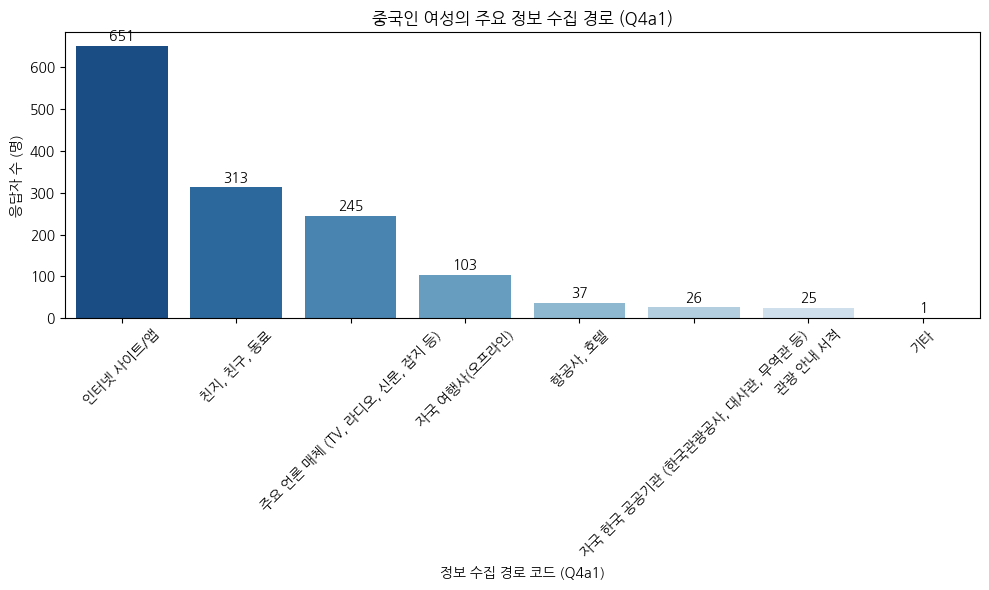

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 0) 중국인 여성 필터링 (D_NAT=1, D_SEX=2)
df_china_f = df[(df['D_NAT'] == '중국') & (df['D_SEX'] == '여성')]

# 1) Q4a1(여행 전 정보 수집 경로 중 첫 번째) 분포 집계 및 내림차순 정렬
src_counts = df_china_f['Q4a1'].value_counts().sort_values(ascending=False)

# 2) 막대그래프
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=src_counts.index,
    y=src_counts.values,
    palette='Blues_r'
)

# 3) 각 막대 위 응답 수 표시
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + max(src_counts.values) * 0.01,
        f'{int(h):,}',
        ha='center', va='bottom',
        fontsize=10
    )

# 4) 레이블·타이틀·포맷
ax.set_xlabel('정보 수집 경로 코드 (Q4a1)')
ax.set_ylabel('응답자 수 (명)')
ax.set_title('중국인 여성의 주요 정보 수집 경로 (Q4a1)')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-35-1254546651.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




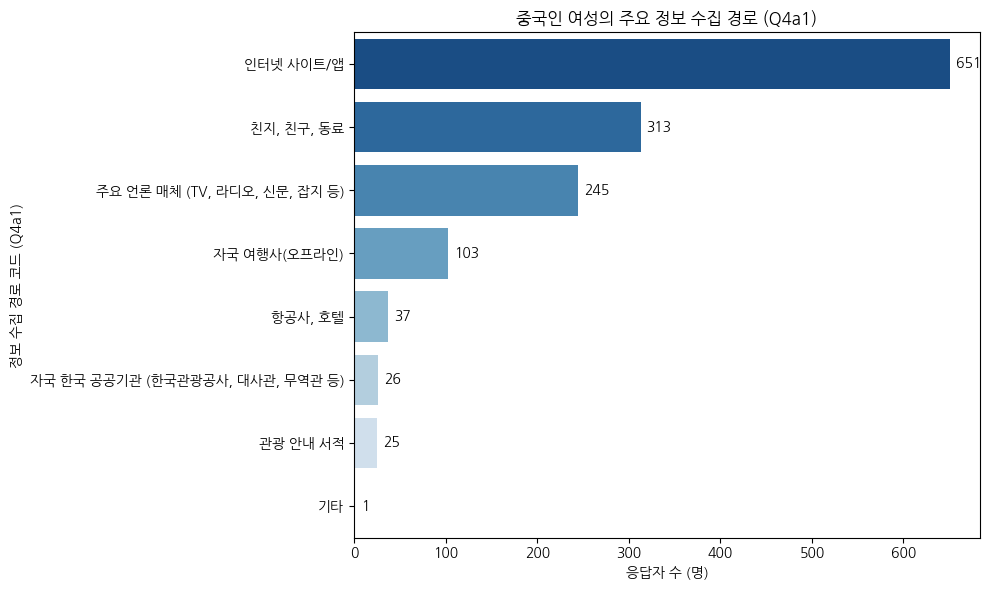

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 0) 중국인 여성 필터링 (D_NAT='중국', D_SEX='여성')
df_china_f = df[(df['D_NAT'] == '중국') & (df['D_SEX'] == '여성')]

# 1) Q4a1 분포 집계 및 내림차순 정렬
src_counts = df_china_f['Q4a1'].value_counts().sort_values(ascending=False)

# 2) 가로 막대그래프
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y=src_counts.index,    # 범주를 y축으로
    x=src_counts.values,   # 값은 x축으로
    palette='Blues_r'
)

# 3) 각 막대 옆에 응답 수 표시
for bar in ax.patches:
    w = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        w + max(src_counts.values) * 0.01,  # x좌표: 막대 끝 + 여유
        y,                                  # y좌표: 막대 중앙
        f'{int(w):,}',
        va='center', ha='left',
        fontsize=10
    )

# 4) 레이블·타이틀·포맷
ax.set_ylabel('정보 수집 경로 코드 (Q4a1)')
ax.set_xlabel('응답자 수 (명)')
ax.set_title('중국인 여성의 주요 정보 수집 경로 (Q4a1)')
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
)
plt.tight_layout()
plt.show()


#### **정보 수집 경로 & 전반적 만족도**

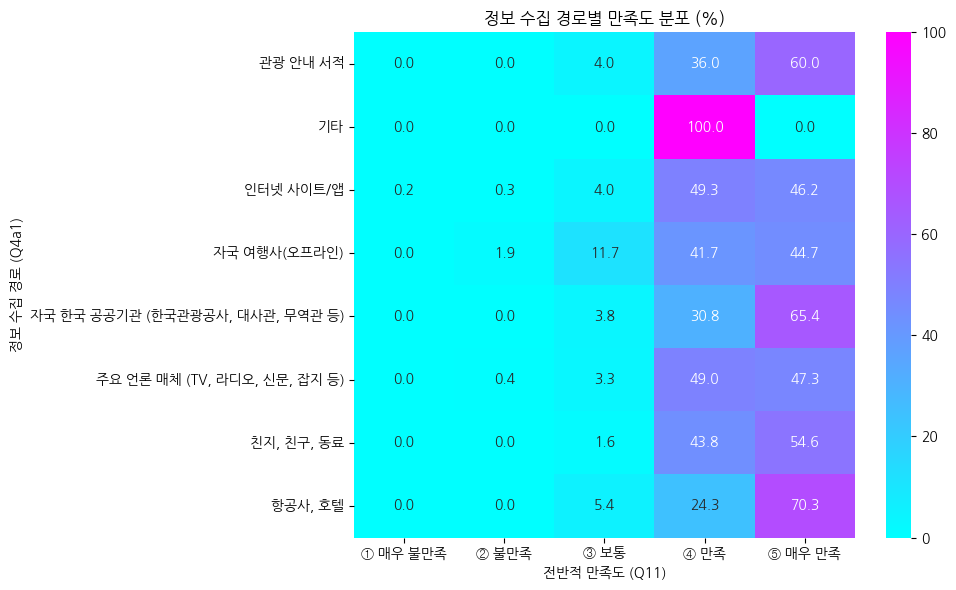

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 교차표 생성
cross_q4a1_q11 = pd.crosstab(df_china_f['Q4a1'], df_china_f['Q11'], normalize='index') * 100

# 시각화 (히트맵)
plt.figure(figsize=(10, 6))
sns.heatmap(cross_q4a1_q11, annot=True, fmt='.1f', cmap='cool')
plt.title('정보 수집 경로별 만족도 분포 (%)')
plt.ylabel('정보 수집 경로 (Q4a1)')
plt.xlabel('전반적 만족도 (Q11)')
plt.tight_layout()
plt.show()


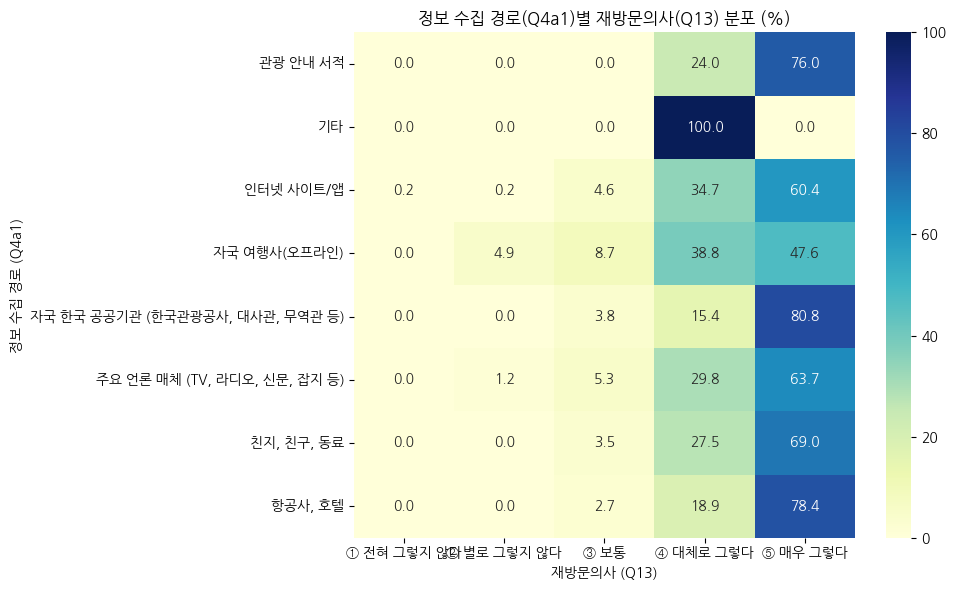

In [37]:
cross_q4a1_q13 = pd.crosstab(df_china_f['Q4a1'], df_china_f['Q13'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(cross_q4a1_q13, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('정보 수집 경로(Q4a1)별 재방문의사(Q13) 분포 (%)')
plt.xlabel('재방문의사 (Q13)')
plt.ylabel('정보 수집 경로 (Q4a1)')
plt.tight_layout()
plt.show()


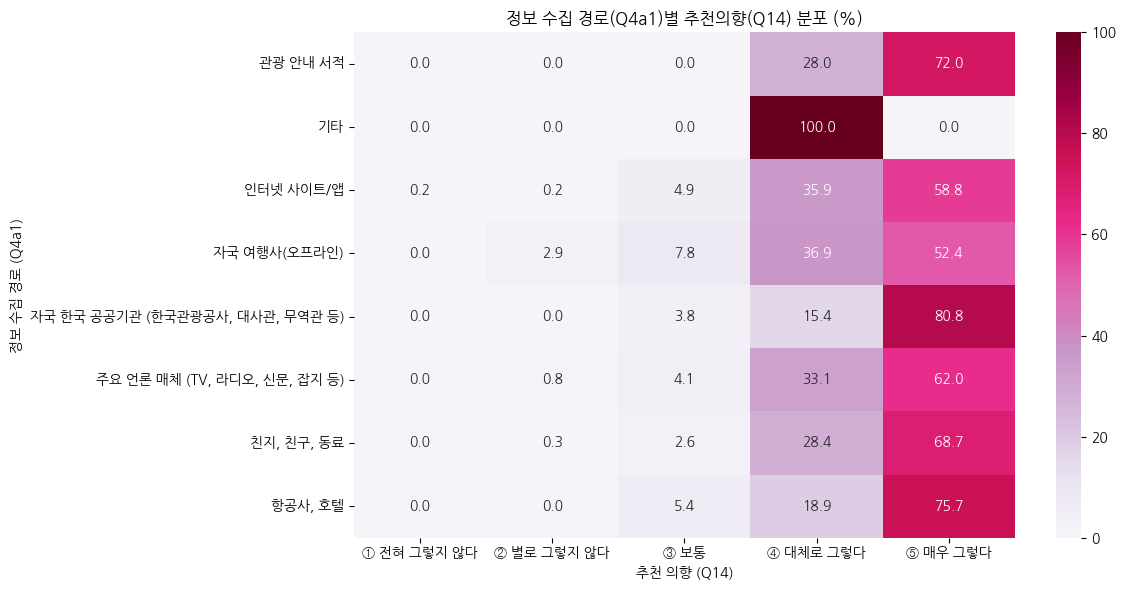

In [38]:
cross_q4a1_q14 = pd.crosstab(df_china_f['Q4a1'], df_china_f['Q14'], normalize='index') * 100

plt.figure(figsize=(12, 6))
sns.heatmap(cross_q4a1_q14, annot=True, fmt='.1f', cmap='PuRd')
plt.title('정보 수집 경로(Q4a1)별 추천의향(Q14) 분포 (%)')
plt.xlabel('추천 의향 (Q14)')
plt.ylabel('정보 수집 경로 (Q4a1)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-39-3105175425.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




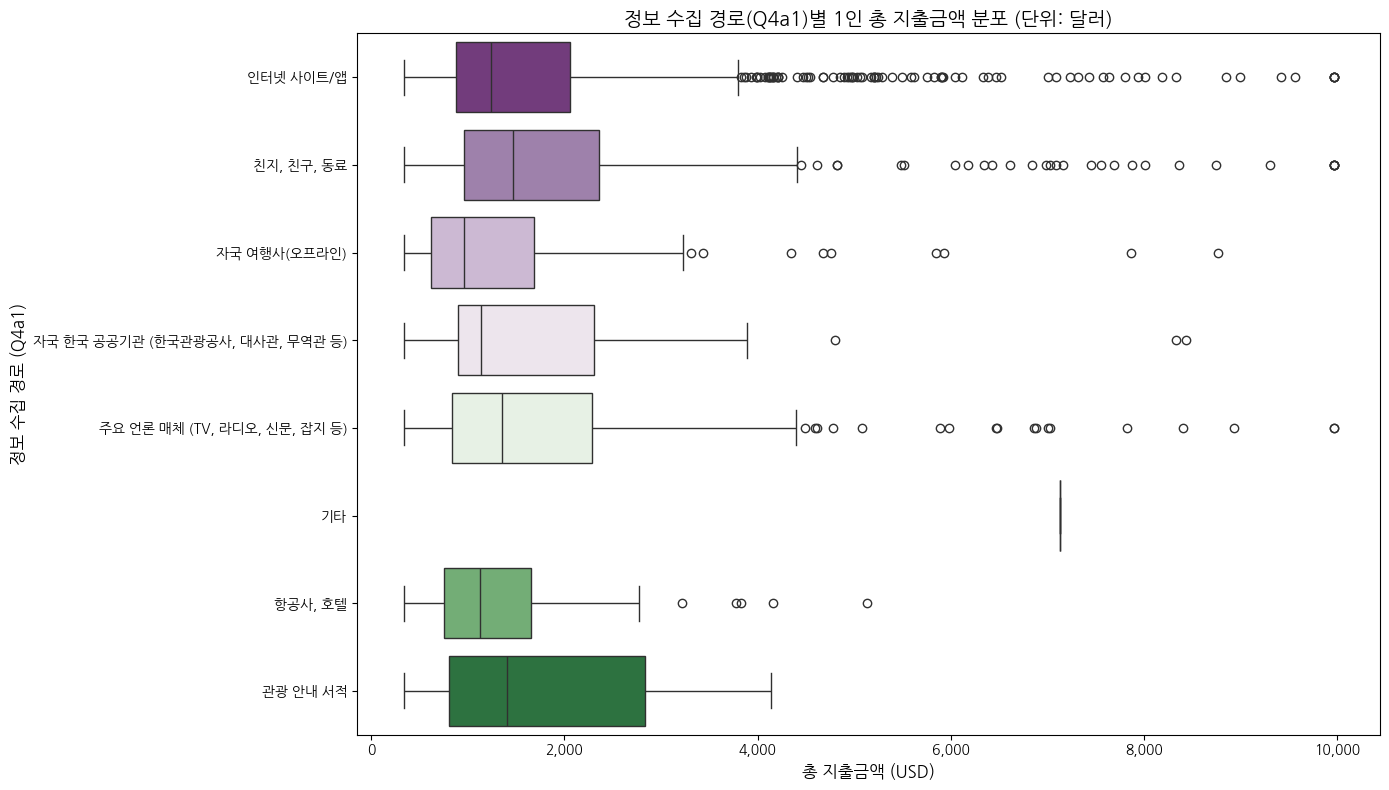

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plot_df = df_china_f[['Q4a1', '총액1인TOT2']].dropna()

plt.figure(figsize=(14, 8))
ax = sns.boxplot(y='Q4a1', x='총액1인TOT2', data=plot_df, palette='PRGn')

ax.set_title('정보 수집 경로(Q4a1)별 1인 총 지출금액 분포 (단위: 달러)', fontsize=14)
ax.set_xlabel('총 지출금액 (USD)', fontsize=12)
ax.set_ylabel('정보 수집 경로 (Q4a1)', fontsize=12)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


/tmp/ipython-input-40-437421638.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




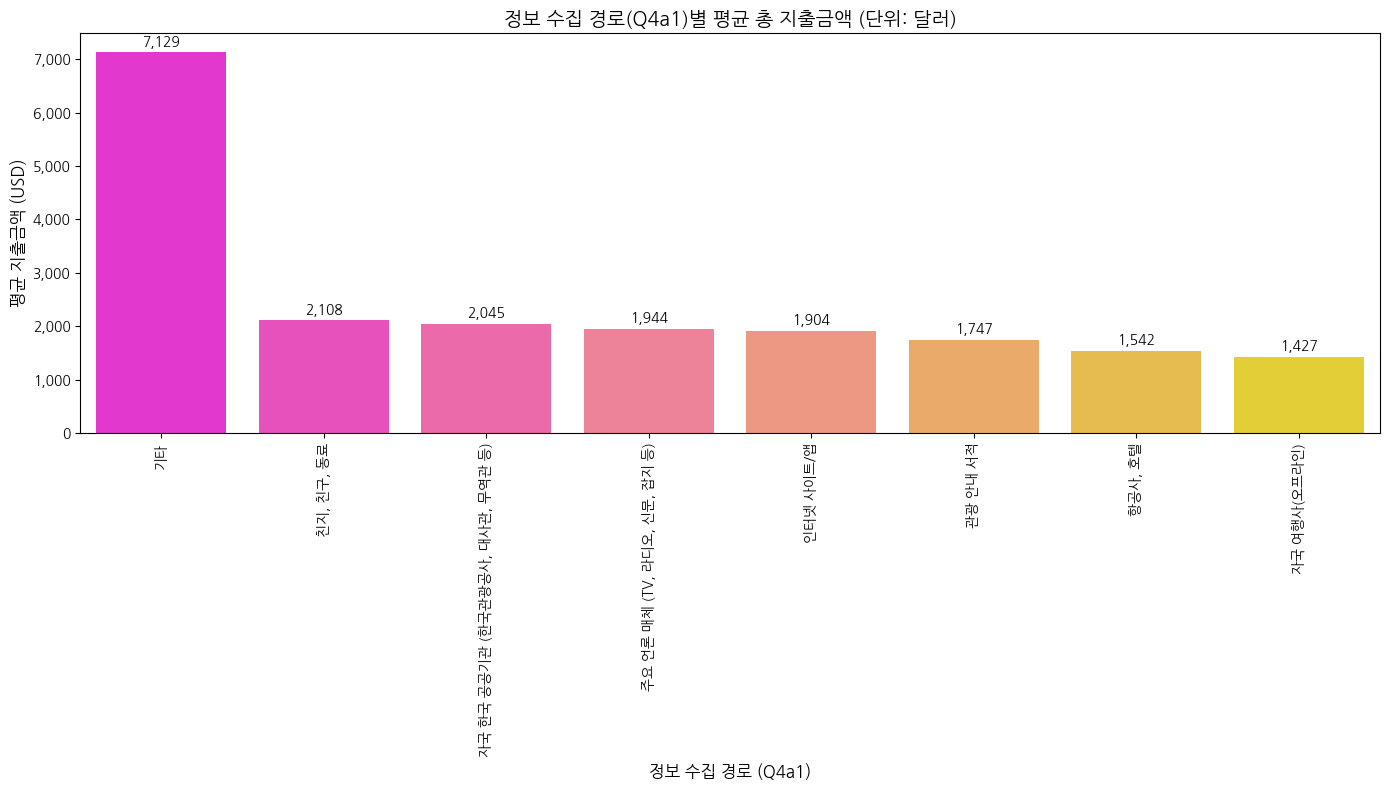

In [40]:
avg_spending_by_q4a1 = df_china_f.groupby('Q4a1')['총액1인TOT2'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=avg_spending_by_q4a1.index, y=avg_spending_by_q4a1.values, palette='spring')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(avg_spending_by_q4a1.values) * 0.01,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=10
    )

ax.set_title('정보 수집 경로(Q4a1)별 평균 총 지출금액 (단위: 달러)', fontsize=14)
ax.set_xlabel('정보 수집 경로 (Q4a1)', fontsize=12)
ax.set_ylabel('평균 지출금액 (USD)', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-41-728131487.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




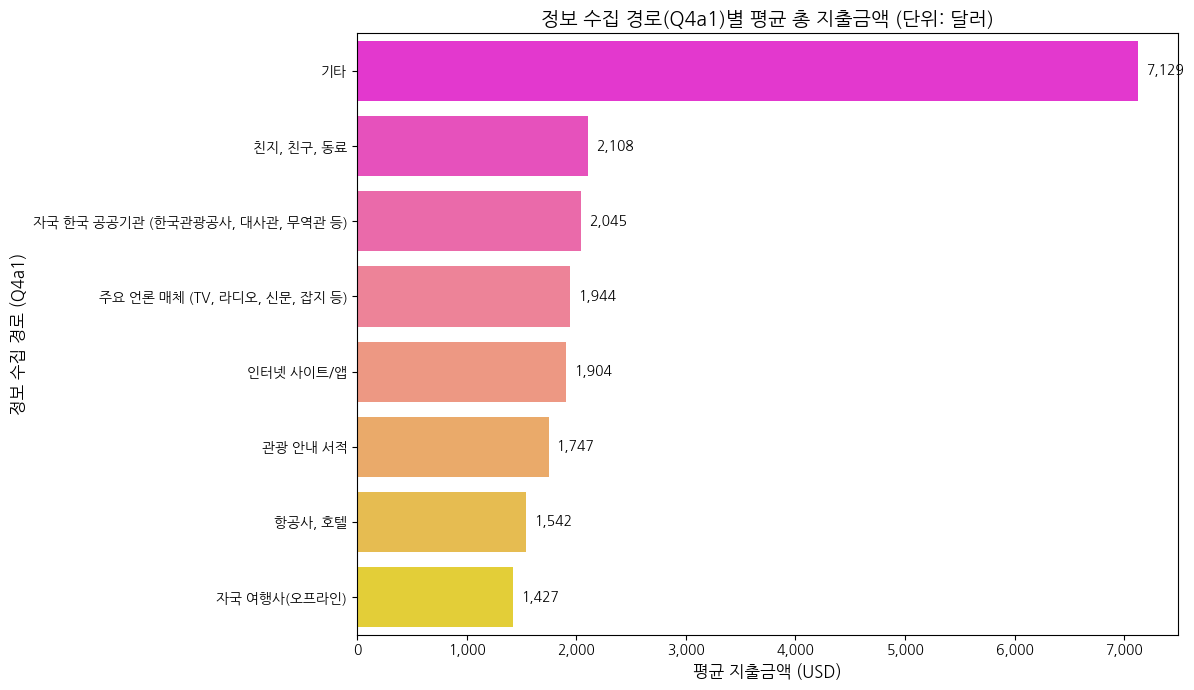

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. 평균 계산 (오름차순으로 하면 위에서 아래로 잘 정렬됨)
avg_spending_by_q4a1 = df_china_f.groupby('Q4a1')['총액1인TOT2'].mean().sort_values(ascending=False)

# 2. 수평 막대그래프
plt.figure(figsize=(12, 7))
ax = sns.barplot(y=avg_spending_by_q4a1.index, x=avg_spending_by_q4a1.values, palette='spring')

# 3. 값 표시 (막대 오른쪽에 텍스트)
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + max(avg_spending_by_q4a1.values) * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{int(width):,}',
        ha='left', va='center',
        fontsize=10
    )

# 4. 제목 및 라벨
ax.set_title('정보 수집 경로(Q4a1)별 평균 총 지출금액 (단위: 달러)', fontsize=14)
ax.set_xlabel('평균 지출금액 (USD)', fontsize=12)
ax.set_ylabel('정보 수집 경로 (Q4a1)', fontsize=12)

# 5. x축 포맷: 천단위 콤마
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


## **방문 횟수**

/tmp/ipython-input-42-3906130653.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




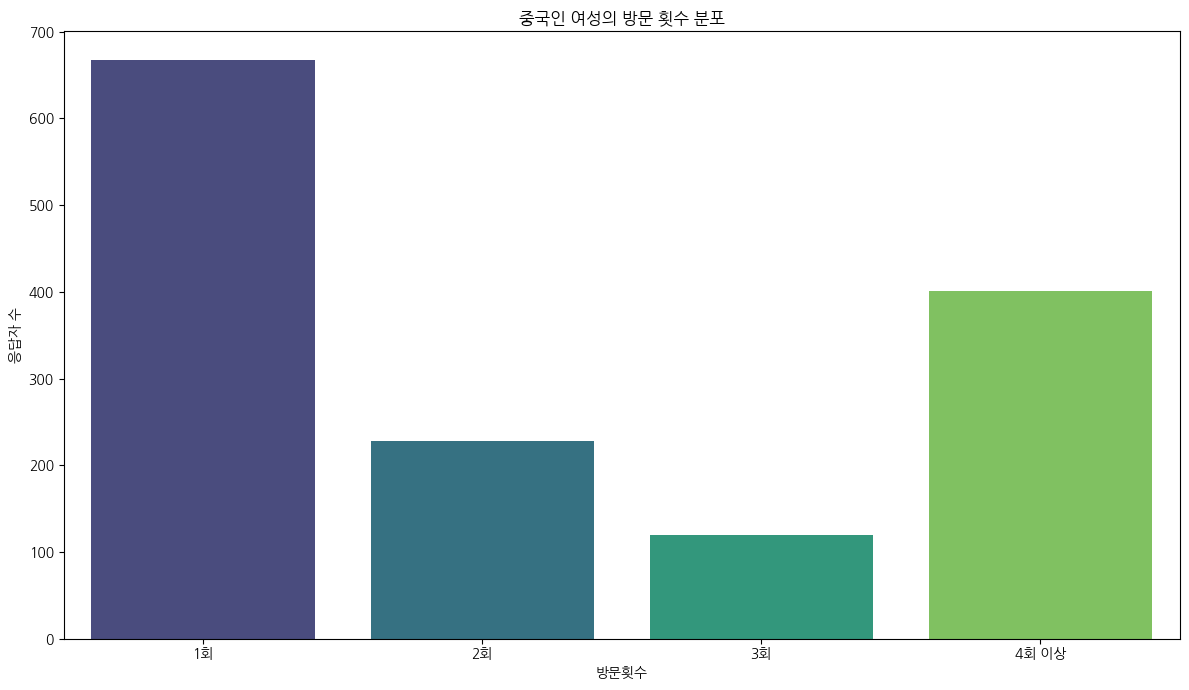

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 필터링
df_cf = df[(df['D_NAT']=='중국')&(df['D_SEX']=='여성')]

# 2) RVIT 분포
rvit_counts = df_cf['RVIT'].value_counts().sort_index()

plt.figure(figsize=(12,7))
sns.barplot(x=rvit_counts.index, y=rvit_counts.values, palette='viridis')
plt.xlabel('방문횟수')
plt.ylabel('응답자 수')
plt.title('중국인 여성의 방문 횟수 분포')
plt.tight_layout()
plt.show()

/tmp/ipython-input-43-3160794115.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




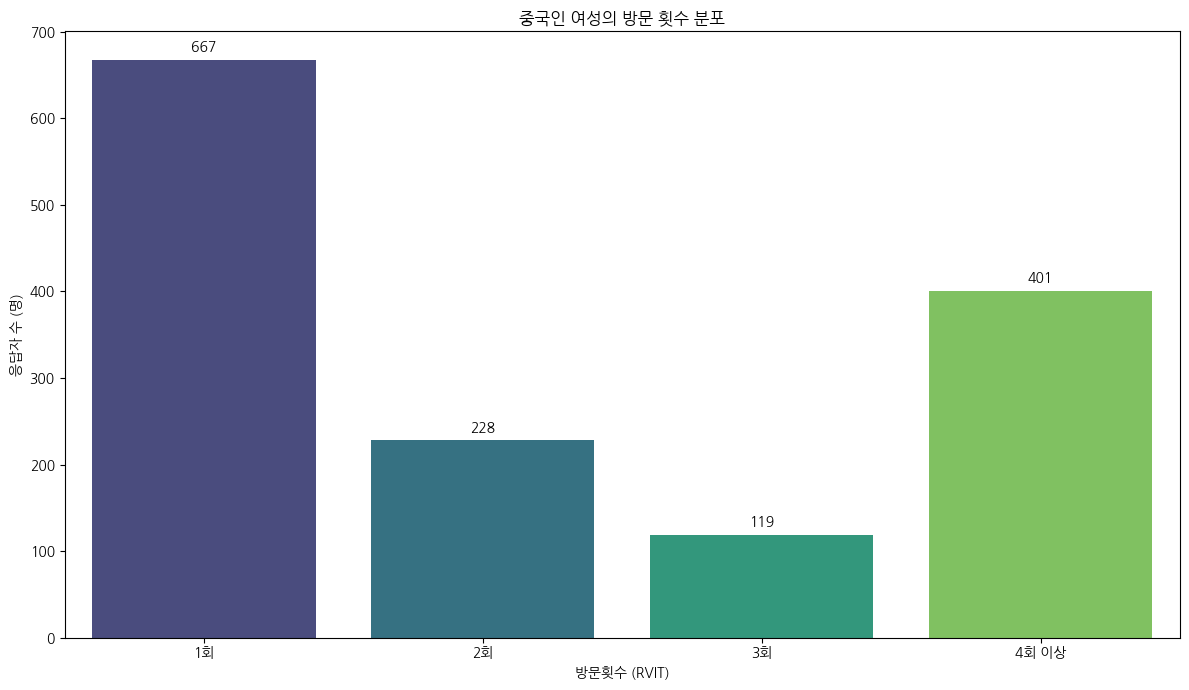

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1) 중국인 여성 필터링
df_cf = df[(df['D_NAT']=='중국') & (df['D_SEX']=='여성')]

# 2) RVIT 분포 집계
rvit_counts = df_cf['RVIT'].value_counts().sort_index()

# 3) 막대그래프 그리기
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=rvit_counts.index, y=rvit_counts.values, palette='viridis', ax=ax)

# 4) 각 막대 위에 수치 표시
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(rvit_counts.values) * 0.01,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=10
    )

# 5) 레이블·타이틀·포맷
ax.set_xlabel('방문횟수 (RVIT)')
ax.set_ylabel('응답자 수 (명)')
ax.set_title('중국인 여성의 방문 횟수 분포')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.tight_layout()
plt.show()


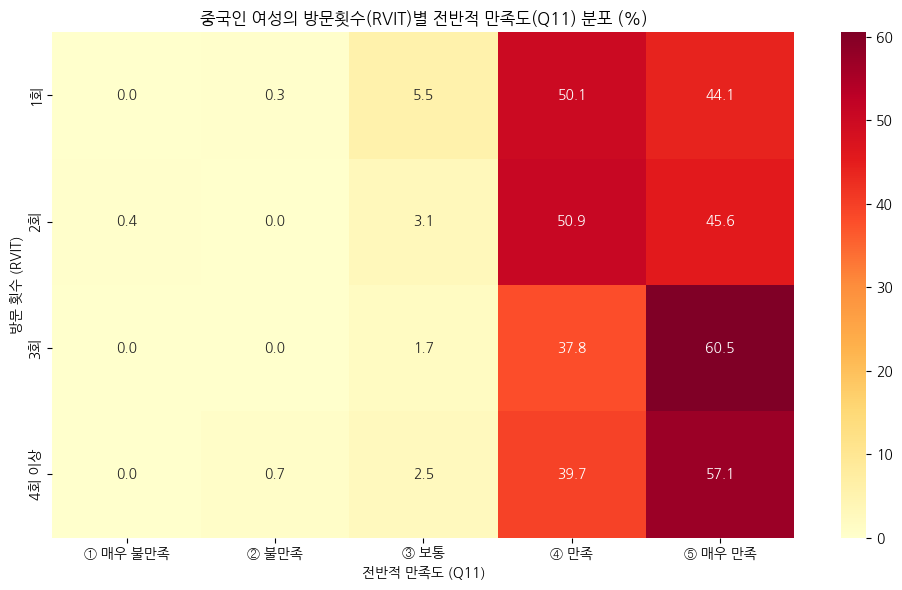

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. RVIT × Q11 교차표 생성
cross_rvit_q11 = pd.crosstab(df_cf['RVIT'], df_cf['Q11'], normalize='index') * 100

# 2. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_rvit_q11, annot=True, fmt='.1f', cmap='YlOrRd')

# 3. 레이블 설정
plt.title('중국인 여성의 방문횟수(RVIT)별 전반적 만족도(Q11) 분포 (%)')
plt.xlabel('전반적 만족도 (Q11)')
plt.ylabel('방문 횟수 (RVIT)')
plt.tight_layout()
plt.show()


## **여행 계획시 고려 국가**

/tmp/ipython-input-45-2754900794.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




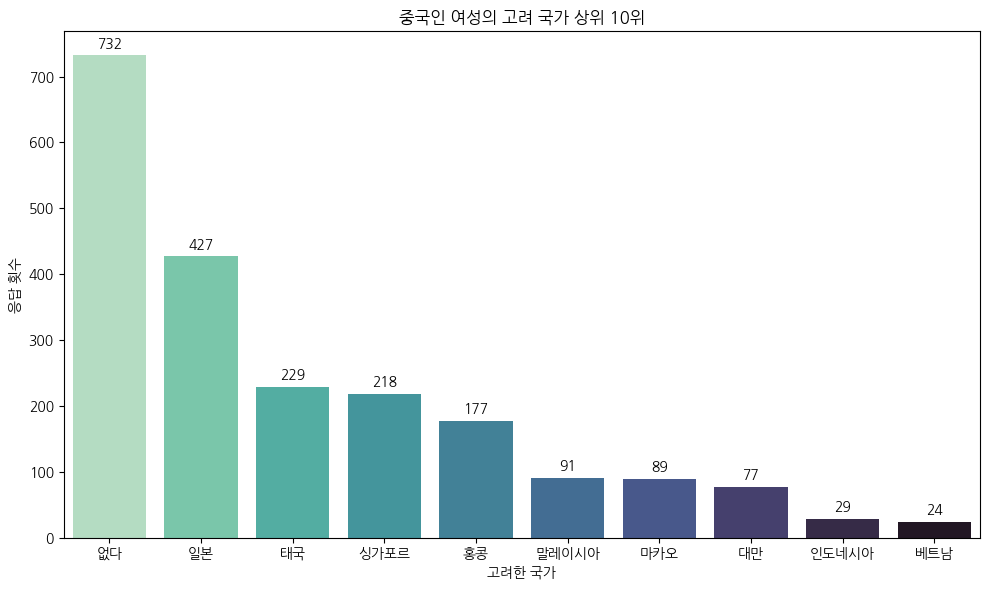

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1) 고려 국가 상위 10개 추출 (melt & count)
consider_cols = ['Q2a1','Q2a2','Q2a3','Q2a_dk']
cons_long = df_cf[consider_cols].melt(value_name='country').dropna(subset=['country'])
cons_counts = cons_long['country'].value_counts().head(10)

# 2) 수직 막대그래프로 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cons_counts.index,     # 국가 코드
    y=cons_counts.values,    # 응답 횟수
    palette='mako_r'
)

# 3) 막대 위에 수치 표시
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,  # x 위치: 바 중앙
        h + max(cons_counts.values) * 0.01,  # y 위치: 바 위 살짝
        f'{int(h):,}',                     # 천 단위 쉼표
        ha='center', va='bottom',
        fontsize=10
    )

# 4) 레이블·타이틀·포맷
ax.set_xlabel('고려한 국가')
ax.set_ylabel('응답 횟수')
ax.set_title('중국인 여성의 고려 국가 상위 10위')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-46-3261542058.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




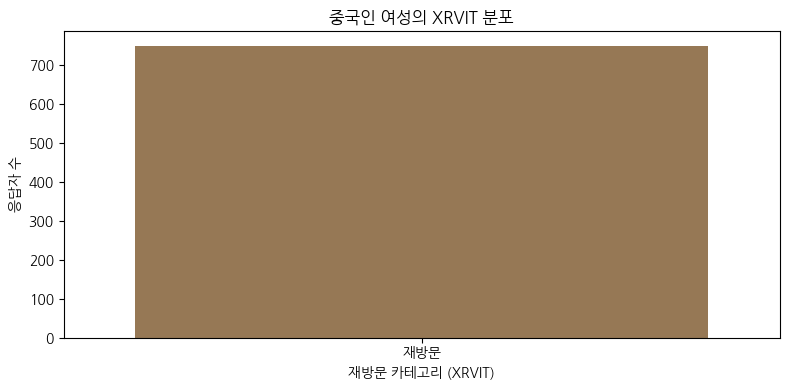

In [46]:
# XRVIT 분포
xrvit_counts = df_cf['XRVIT'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=xrvit_counts.index, y=xrvit_counts.values, palette='cubehelix')
plt.xlabel('재방문 카테고리 (XRVIT)')
plt.ylabel('응답자 수')
plt.title('중국인 여성의 XRVIT 분포')
plt.tight_layout()
plt.show()


/tmp/ipython-input-47-3471629771.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




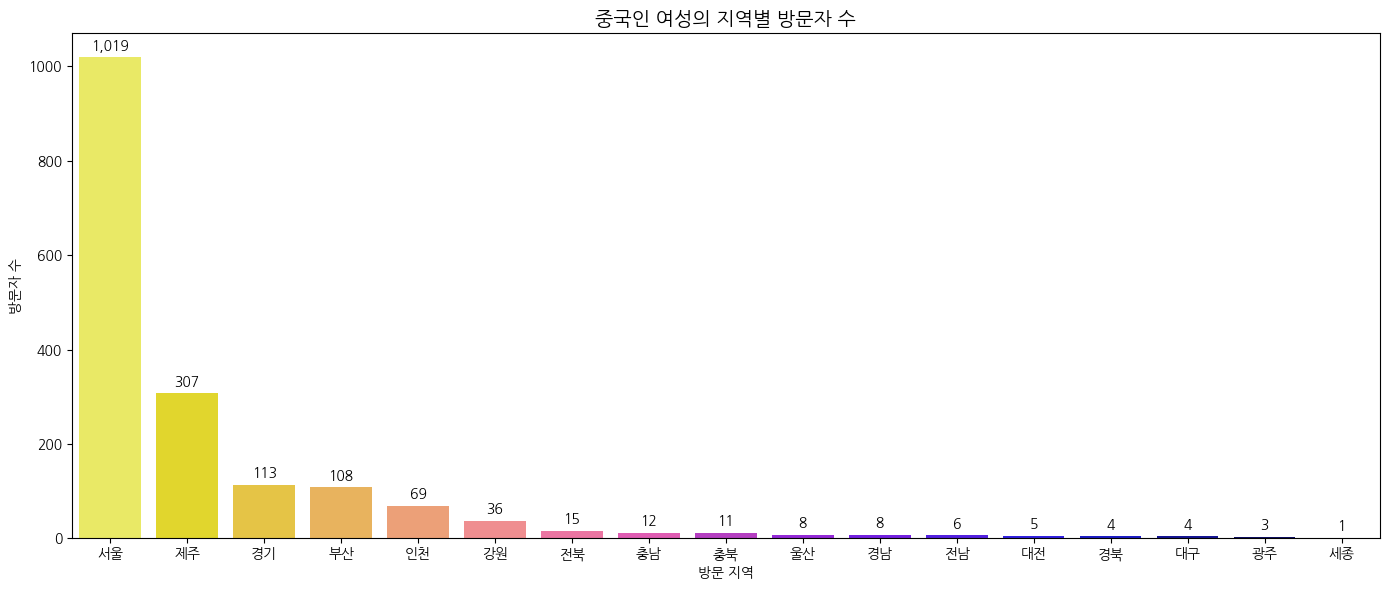

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 지역별 방문자 수 계산
q9_visit_cols = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]
visit_area_df = df_china_f[q9_visit_cols]
visit_area_long = visit_area_df.stack().dropna()
area_visited_count = visit_area_long.value_counts().reset_index()
area_visited_count.columns = ['region', 'count']

# 2. 시각화
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=area_visited_count,
    x='region', y='count',
    palette='gnuplot2_r'
)

# 3. 막대 위 수치 표시
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(area_visited_count['count']) * 0.01,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=10
    )

# 4. 기타 설정
plt.title('중국인 여성의 지역별 방문자 수', fontsize=14)
plt.xlabel('방문 지역')
plt.ylabel('방문자 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


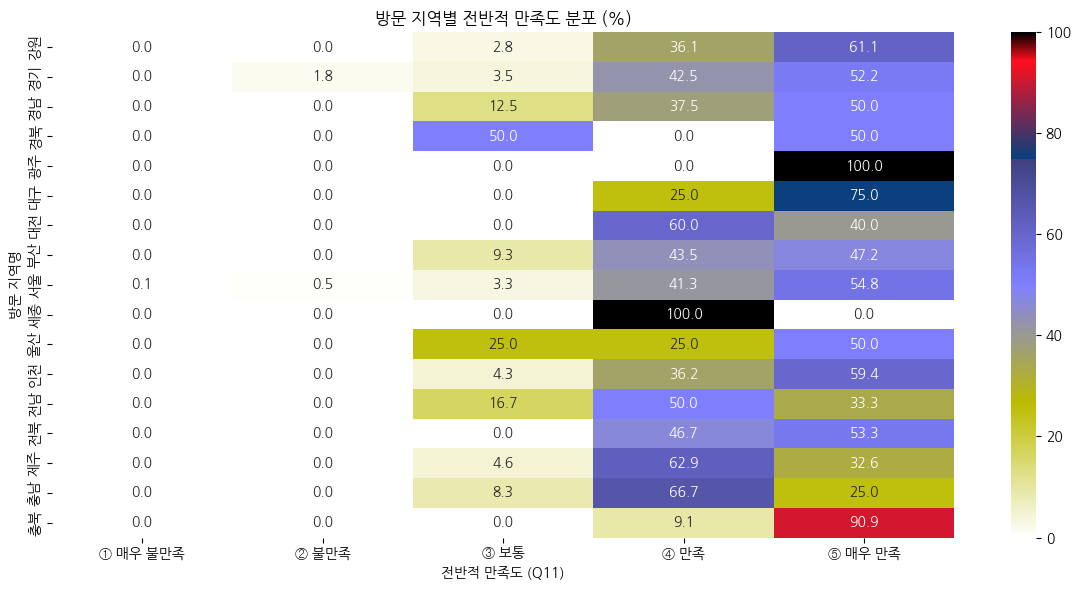

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. melt하여 긴 형태로 변환 (방문 지역, 응답자 기준)
visit_melt = df_china_f[q9_visit_cols + ['Q11']].melt(
    id_vars='Q11',
    value_vars=q9_visit_cols,
    var_name='visit_var',
    value_name='region_name'
)

# 2. 실제 방문한 지역만 필터 (NaN 제외)
visit_melt = visit_melt.dropna(subset=['region_name'])

# 3. 교차표 생성 (지역명 × 만족도 분포)
cross_region_q11 = pd.crosstab(
    visit_melt['region_name'],
    visit_melt['Q11'],
    normalize='index'
) * 100  # 퍼센트로 변환

# 4. 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cross_region_q11, annot=True, fmt='.1f', cmap='gist_stern_r')
plt.title('방문 지역별 전반적 만족도 분포 (%)')
plt.xlabel('전반적 만족도 (Q11)')
plt.ylabel('방문 지역명')
plt.tight_layout()
plt.show()
